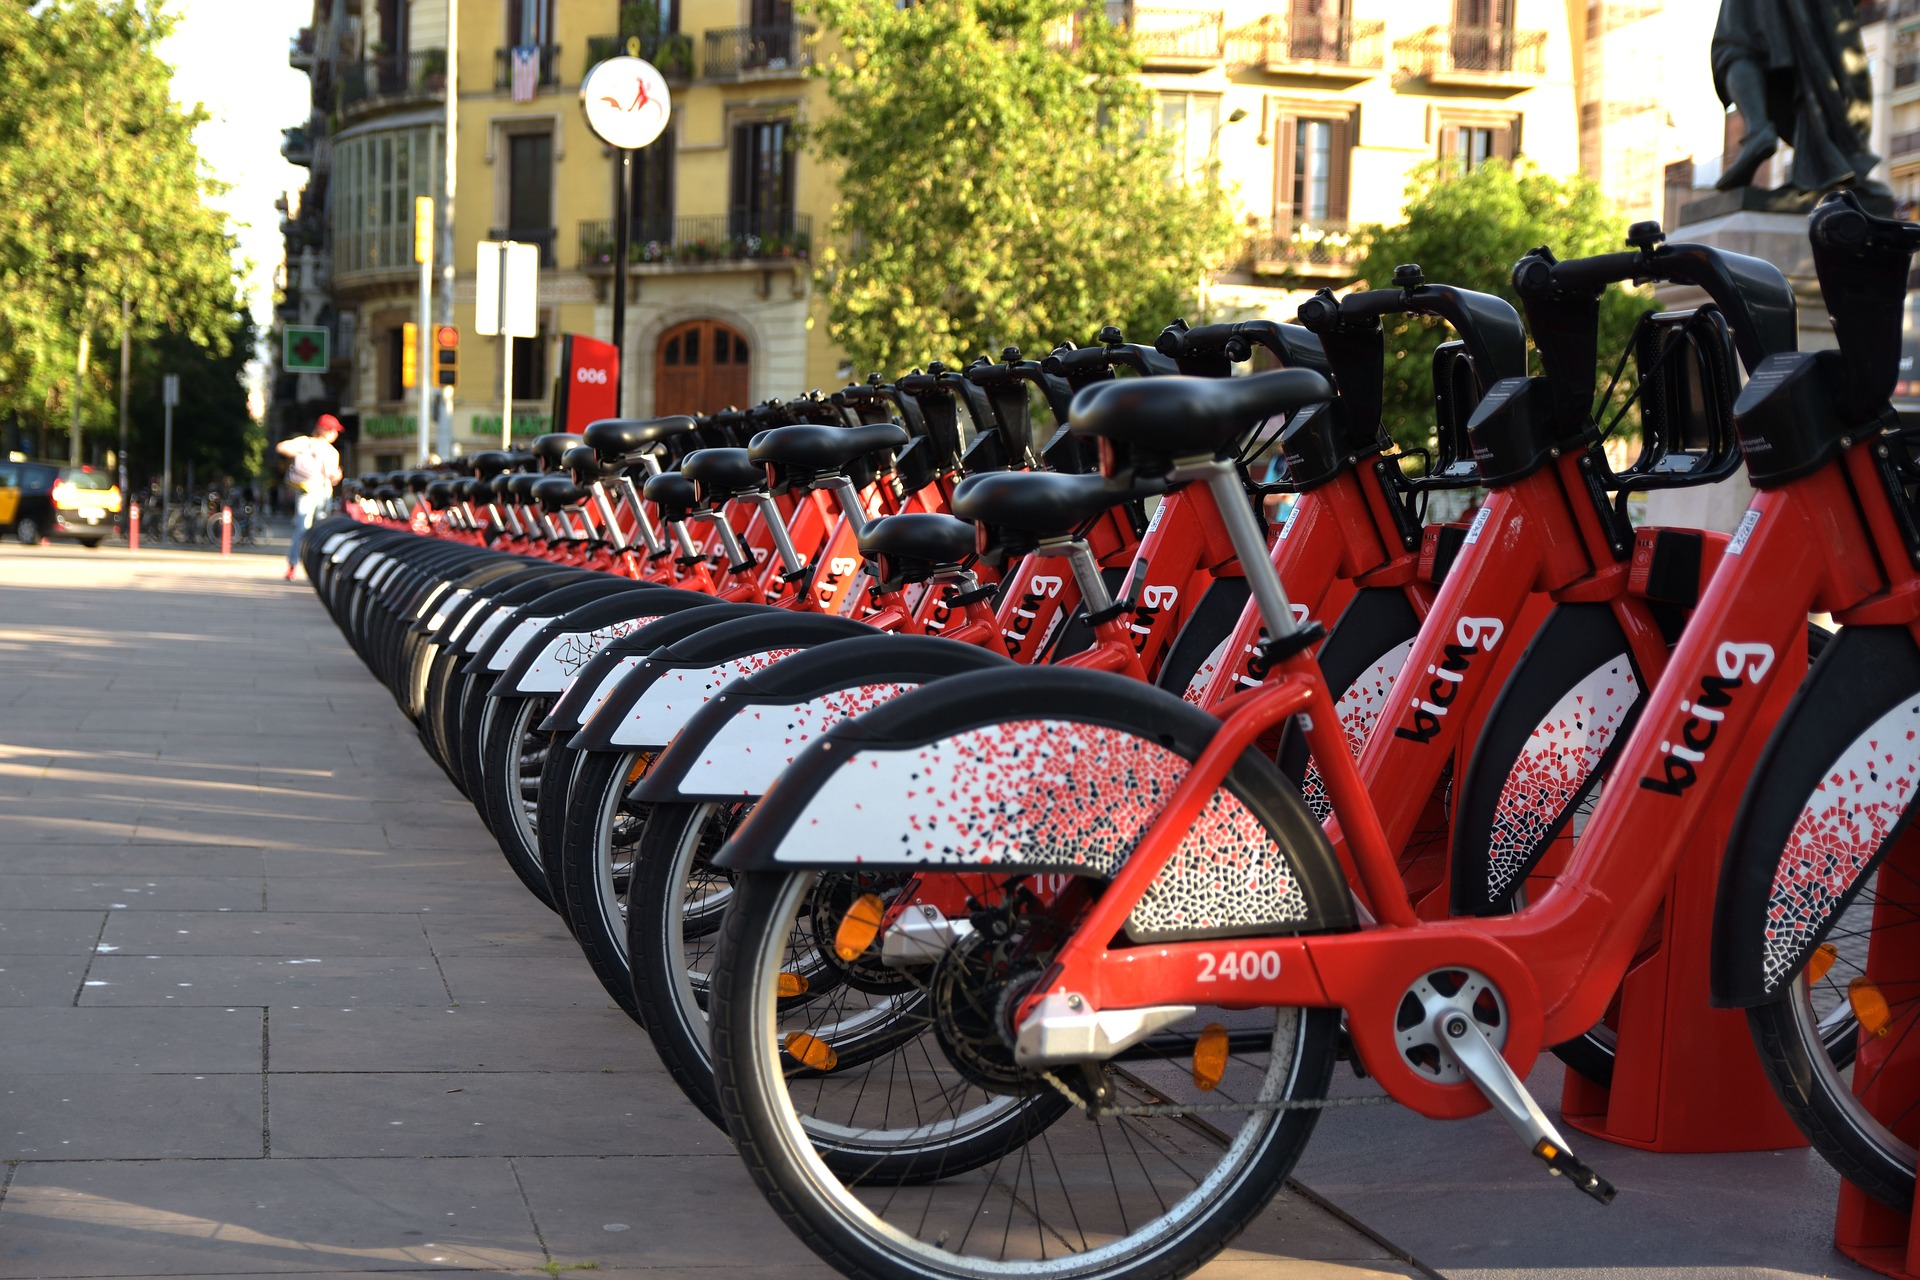

### problem statement & data description

***Problem Description***

***Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.***


***Data Description***

***The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
Attribute Information:***


##### Date : year-month-day
##### Rented Bike count - Count of bikes rented at each hour
##### Hour - Hour of he day
##### Temperature-Temperature in Celsius
##### Humidity - %
##### Windspeed - m/s
##### Visibility - 10m
##### Dew point temperature - Celsius
##### Solar radiation - MJ/m2
##### Rainfall - mm
##### Snowfall - cm
##### Seasons - Winter, Spring, Summer, Autumn
##### Holiday - Holiday/No holiday
##### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)
df=pd.read_csv('SeoulBikeData.csv')
df.head()

Date  Rented Bike Count  Hour  Temperature(�C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(�C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

***statistical information about data sets***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(�C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
df.corr()

Rented Bike Count      Hour  Temperature(�C)  \
Rented Bike Count                   1.000000  0.410257         0.538558   
Hour                                0.410257  1.000000         0.124114   
Temperature(�C)                     0.538558  0.124114         1.000000   
Humidity(%)                        -0.199780 -0.241644         0.159371   
Wind speed (m/s)                    0.121108  0.285197        -0.036252   
Visibility (10m)                    0.199280  0.098753         0.034794   
Dew point temperature(�C)           0.379788  0.003054         0.912798   
Solar Radiation (MJ/m2)             0.261837  0.145131         0.353505   
Rainfall(mm)                       -0.123074  0.008715         0.050282   
Snowfall (cm)                      -0.141804 -0.021516        -0.218405   

                           Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count            -0.199780          0.121108          0.199280   
Hour                         -0.241644          0.285197          0.098753   
Temperature(�C)               0.159371         -0.036252          0.034794   
Humidity(%)                   1.000000         -0.336683         -0.543090   
Wind speed (m/s)             -0.336683          1.000000          0.171507   
Visibility (10m)             -0.543090          0.171507          1.000000   
Dew point temperature(�C)     0.536894         -0.176486         -0.176630   
Solar Radiation (MJ/m2)      -0.461919          0.332274          0.149738   
Rainfall(mm)                  0.236397         -0.019674         -0.167629   
Snowfall (cm)                 0.108183         -0.003554         -0.121695   

                           Dew point temperature(�C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.379788                 0.261837   
Hour                                        0.003054                 0.145131   
Temperature(�C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(�C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   

                           Rainfall(mm)  Snowfall (cm)  
Rented Bike Count             -0.123074      -0.141804  
Hour                           0.008715      -0.021516  
Temperature(�C)                0.050282      -0.218405  
Humidity(%)                    0.236397       0.108183  
Wind speed (m/s)              -0.019674      -0.003554  
Visibility (10m)              -0.167629      -0.121695  
Dew point temperature(�C)      0.125597      -0.150887  
Solar Radiation (MJ/m2)       -0.074290      -0.072301  
Rainfall(mm)                   1.000000       0.008500  
Snowfall (cm)                  0.008500       1.000000

In [5]:
df.std()

Rented Bike Count            644.997468
Hour                           6.922582
Temperature(�C)               11.944825
Humidity(%)                   20.362413
Wind speed (m/s)               1.036300
Visibility (10m)             608.298712
Dew point temperature(�C)     13.060369
Solar Radiation (MJ/m2)        0.868746
Rainfall(mm)                   1.128193
Snowfall (cm)                  0.436746
dtype: float64

In [6]:
df.describe()

Rented Bike Count         Hour  Temperature(�C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(�C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

 **This Dataset contains 8760 lines and 14 columns. In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.**

## preprocessing the datasets
***why we handle the missing values?***

***it is important to handle the missing values cause many of machine learning model does not support missing values and it fail if missing values contain***


### missing values

In [7]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<AxesSubplot:>

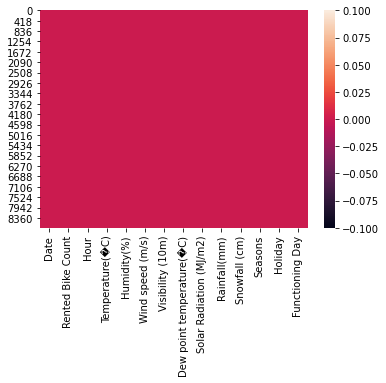

In [8]:
na=df.isnull()
sns.heatmap(data=na)

### changing the column name

In [9]:
df=df.rename(columns={'Rented Bike Count':'bike_count','Temperature(�C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                      'Visibility (10m)':'visibility','Dew point temperature(�C)':'dew-temp','Solar Radiation (MJ/m2)':'solar-rad',
                     'Rainfall(mm)':'rainfall','Snowfall (cm)':'snowfall'})

In [10]:
df.sample(5)

Date  bike_count  Hour  Temperature  Humidity  Wind_speed  \
6648  04/09/2018         500     0         21.4        97         0.1   
8640  26/11/2018         387     0          3.3        85         1.1   
1468  31/01/2018          34     4         -2.4        82         1.5   
2040  24/02/2018         226     0          4.6        82         3.0   
6001  08/08/2018         700     1         28.5        80         1.5   

      visibility  dew-temp  solar-rad  rainfall  snowfall Seasons     Holiday  \
6648         404      20.8        0.0       0.0       0.0  Autumn  No Holiday   
8640         351       1.0        0.0       0.0       0.3  Autumn  No Holiday   
1468         877      -5.0        0.0       0.0       3.5  Winter  No Holiday   
2040         240       1.7        0.0       0.0       0.0  Winter  No Holiday   
6001        1306      24.7        0.0       0.0       0.0  Summer  No Holiday   

     Functioning Day  
6648             Yes  
8640             Yes  
1468             Yes  
2040             Yes  
6001             Yes

### Breaking the date columns

In [11]:
df['Date']=pd.to_datetime(df['Date'])
df['day']=df['Date'].dt.day_name()
df['months']=df['Date'].dt.month_name()
df['year']=df['Date'].dt.year

In [12]:
df['weakend']=df['day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [13]:
df.drop(columns=['Date','year'],axis=1,inplace=True)
df.sample(10)

bike_count  Hour  Temperature  Humidity  Wind_speed  visibility  \
5561        1468    17         34.3        44         2.1        1704   
2645          80     5          1.3        40         2.3        2000   
5328         240     0         24.6        96         0.7         308   
2524          85     4          5.7        62         2.4        2000   
1170         506    18          2.0        39         2.1        1259   
3539         986    11         17.7        44         1.5         945   
8459         645    11          7.6        35         0.8        1695   
3153           0     9         11.8        59         2.1         975   
4679        1394    23         21.5        62         0.1        1827   
7189        1686    13         23.4        34         2.1        2000   

      dew-temp  solar-rad  rainfall  snowfall Seasons     Holiday  \
5561      20.2       1.87       0.0       0.0  Summer  No Holiday   
2645     -10.8       0.00       0.0       0.0  Spring  No Holiday   
5328      23.9       0.00       0.5       0.0  Summer  No Holiday   
2524      -1.0       0.00       0.0       0.0  Spring  No Holiday   
1170     -10.5       0.01       0.0       0.0  Winter  No Holiday   
3539       5.2       2.51       0.0       0.0  Spring  No Holiday   
8459      -6.9       1.25       0.0       0.0  Autumn  No Holiday   
3153       4.0       1.44       0.0       0.0  Spring  No Holiday   
4679      13.9       0.00       0.0       0.0  Summer  No Holiday   
7189       6.6       2.84       0.0       0.0  Autumn  No Holiday   

     Functioning Day        day     months  weakend  
5561             Yes     Friday       July        0  
2645             Yes  Wednesday      March        0  
5328             Yes  Wednesday   November        0  
2524             Yes     Friday      March        0  
1170             Yes   Thursday    January        0  
3539             Yes     Friday      April        0  
8459             Yes     Sunday   November        1  
3153              No     Sunday   November        1  
4679             Yes  Wednesday       June        0  
7189             Yes  Wednesday  September        0

In [14]:
df.duplicated().sum()

0

In [15]:
for i in df.columns:
    print('columns',i)
    print(df[i].unique())

columns bike_count
[ 254  204  173 ... 1538  804  595]
columns Hour
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
columns Temperature
[ -5.2  -5.5  -6.   -6.2  -6.4  -6.6  -7.4  -7.6  -6.5  -3.5  -0.5   1.7
   2.4   3.    2.1   1.2   0.8   0.6   0.   -0.3  -0.8  -0.9  -1.3  -1.8
  -2.2  -2.9  -3.8  -4.   -4.3  -4.4  -4.2  -0.4   1.9   4.3   6.    7.3
   7.6   6.4   5.5   5.    4.6   4.1   3.5   4.    3.9   3.3   3.4   3.1
   3.2   4.4   5.1   5.8   6.8   8.    6.7   5.7   5.2   4.7   4.2   3.6
   2.8   2.    0.2  -1.5  -1.1   0.1  -0.1  -0.2  -2.1  -3.6  -4.6  -5.3
  -5.8  -6.1  -6.8  -6.9  -7.2  -7.5  -8.1  -3.9  -2.3  -1.6  -0.7  -2.6
  -3.2  -3.7  -2.8  -2.5  -3.   -3.4  -3.3   1.6   5.3   1.1   1.3   1.4
   1.5   1.    0.3   2.3   3.7   0.7  -1.4  -2.7  -4.8  -7.   -6.7  -2.
  -1.7  -2.4  -3.1  -4.1  -4.7  -5.1  -5.4   2.5   0.4   0.5   0.9   5.4
  -1.   -5.6  -5.9  -7.1  -7.9  -8.6  -9.3  -9.7 -10.2 -10.7 -11.  -11.2
 -11.5 -11.6 -11.8 -12.1 -12.3 -10.5

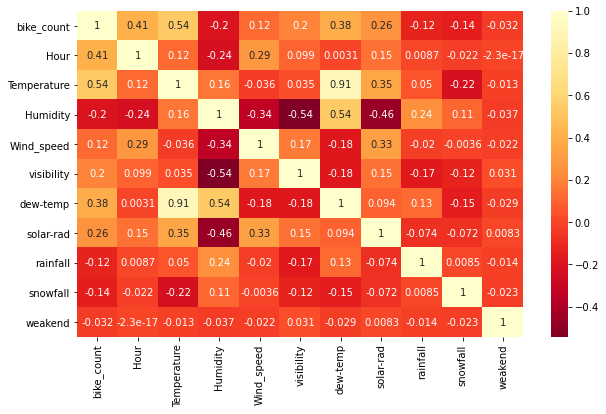

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='YlOrRd_r')
plt.savefig('heatmap.png')

## EDA(exploratory data analysis)

## Why do we perform EDA?

***An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.***

### Univariate Analysis

### Why do you do univariate analysis?

***The key objective of Univariate analysis is to simply describe the data to find patterns within the data.***


## Analysis of Dependent Variable:

### What is a dependent variable in data analysis?

***we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.***


### Analysation of categorical variables
***Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.first we analyze the category data tyep then we proceed with the numerical data type***

### univariet and byvariet analysis 

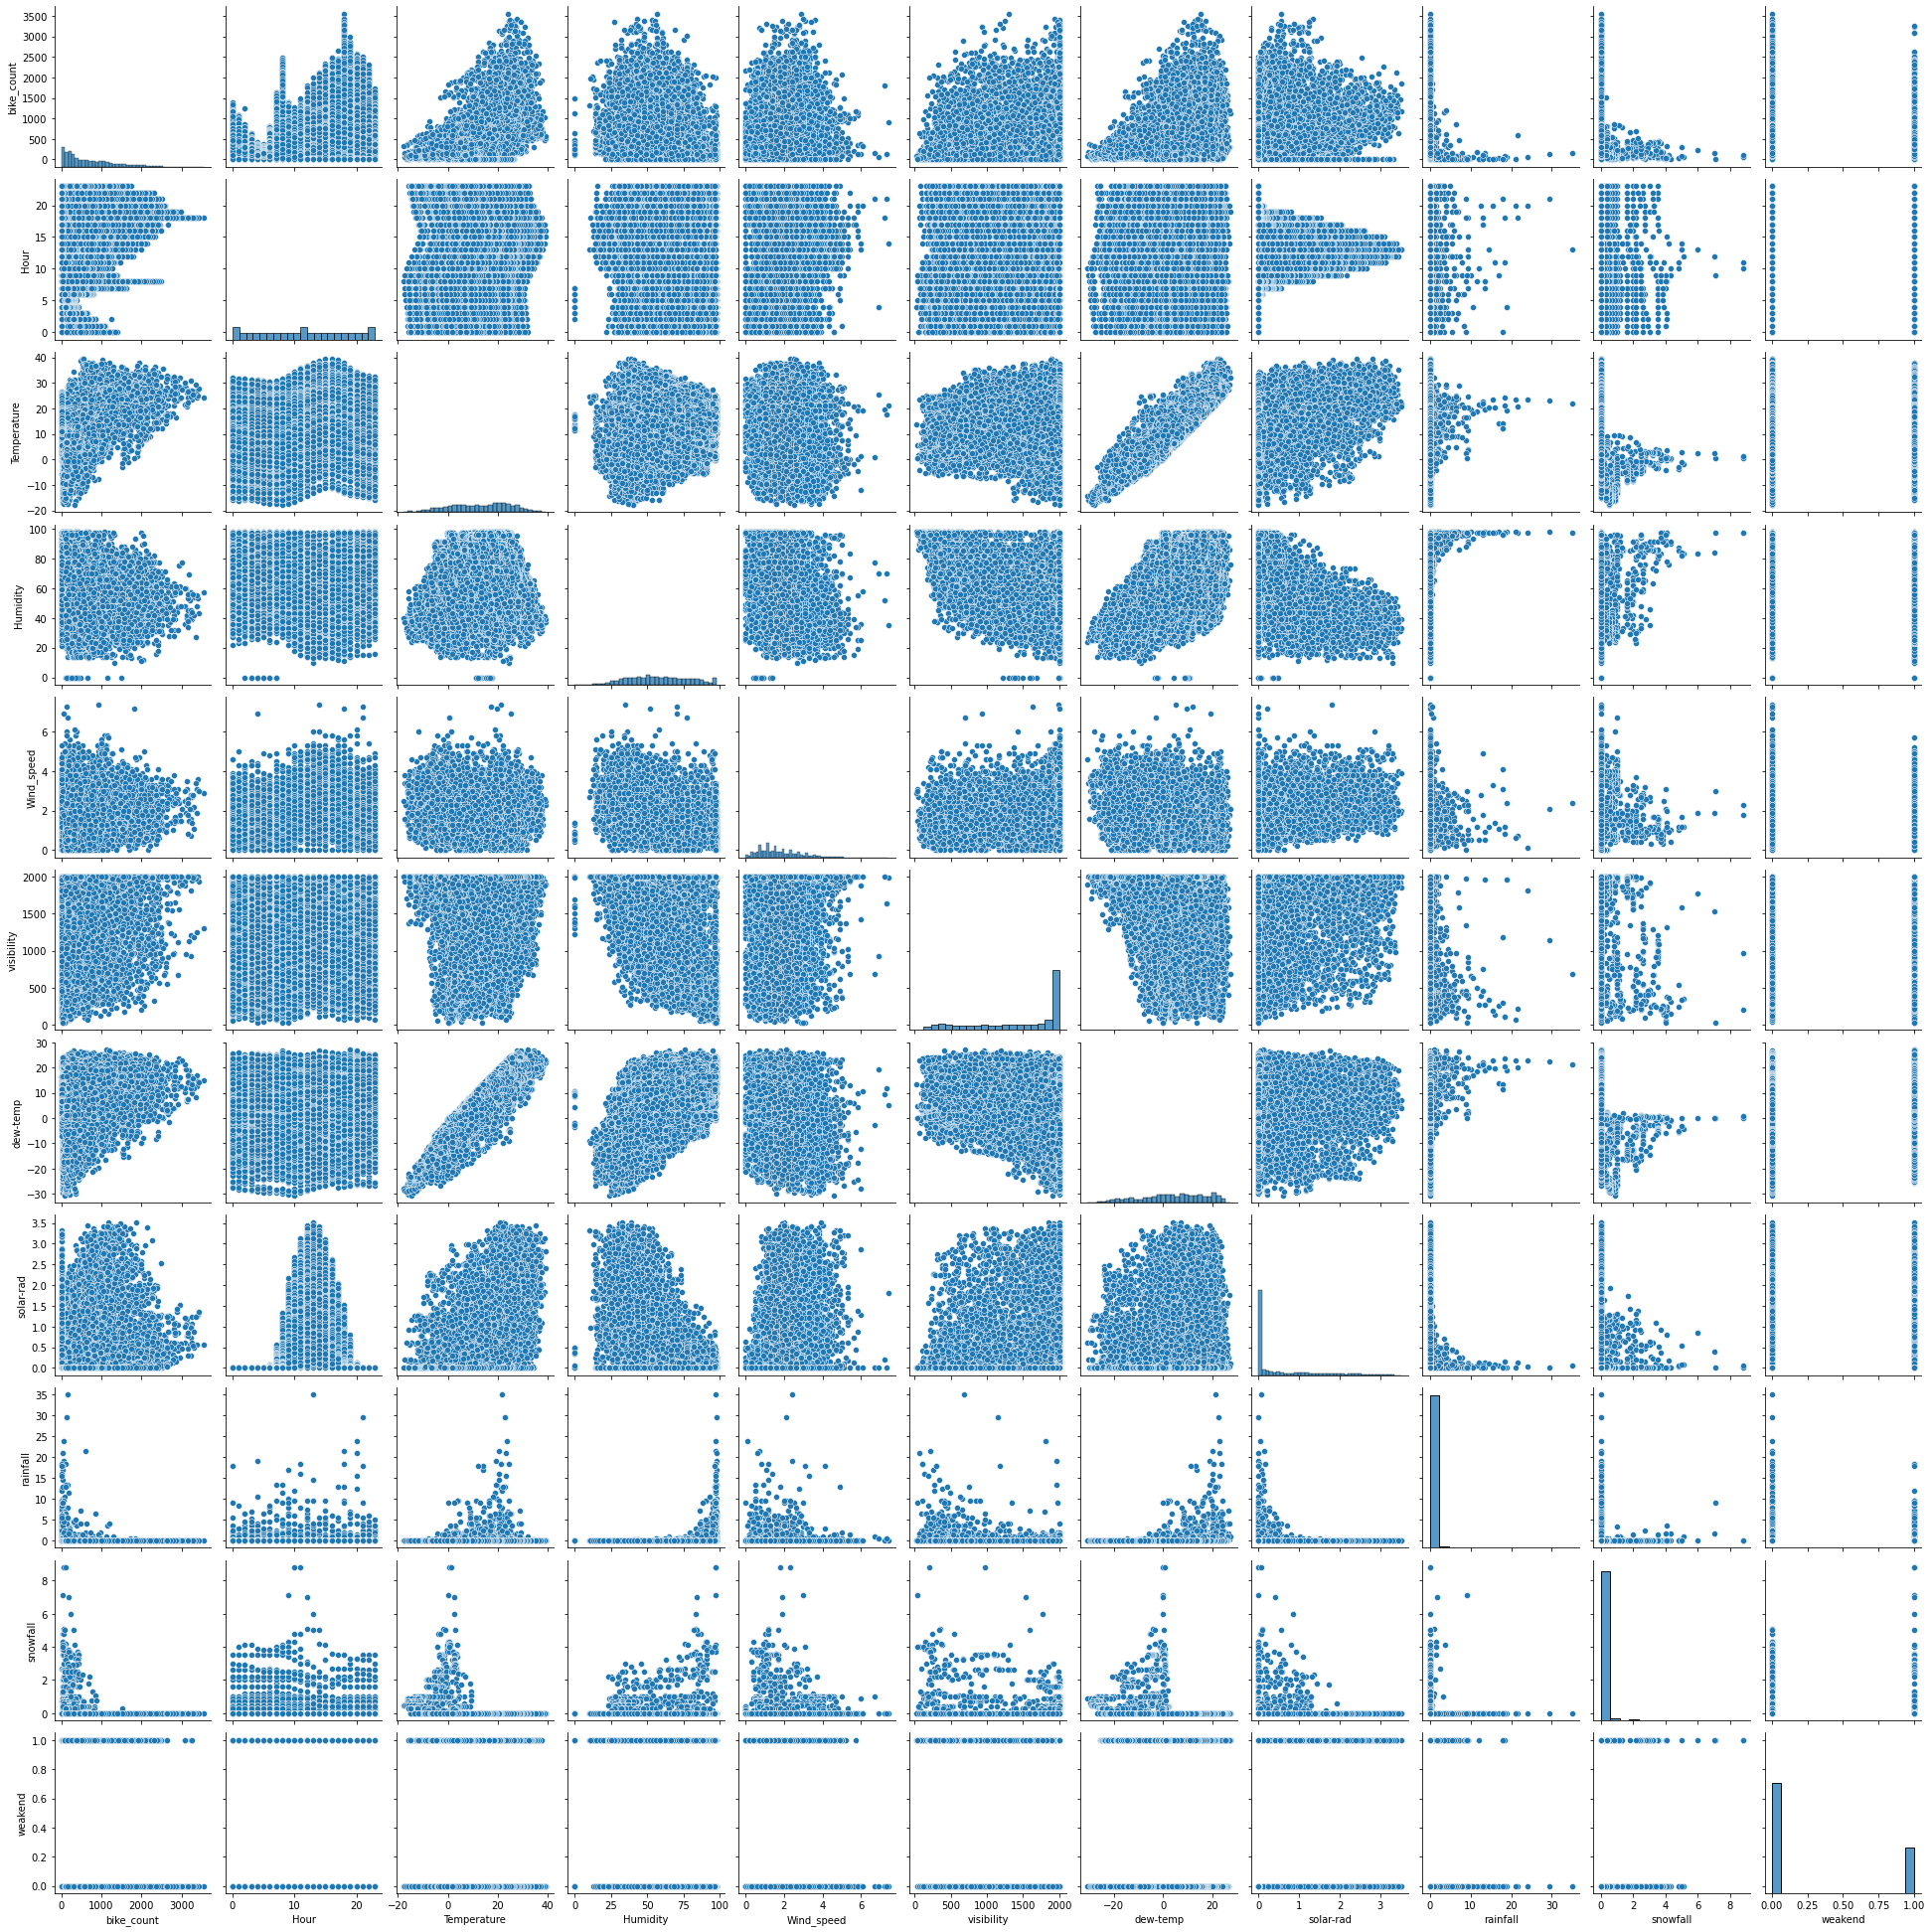

In [17]:
sns.pairplot(data=df)

### ***Analysation of catagorical variable***

### holiday

<AxesSubplot:xlabel='Holiday', ylabel='bike_count'>

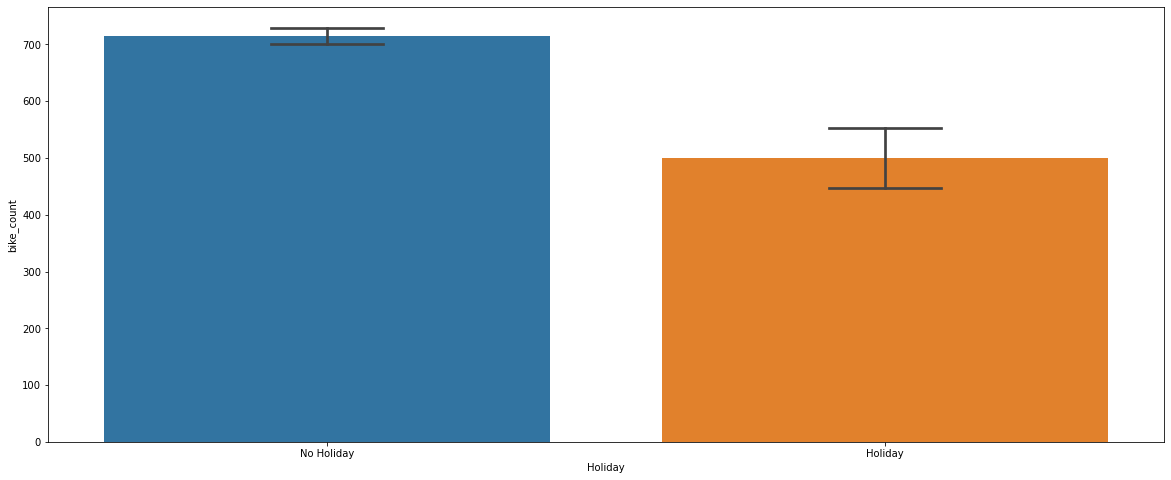

In [18]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(x='Holiday',y='bike_count',ax=ax,data=df,capsize=0.2)

Text(0.5, 1.0, 'count of rented bike according to holiday')

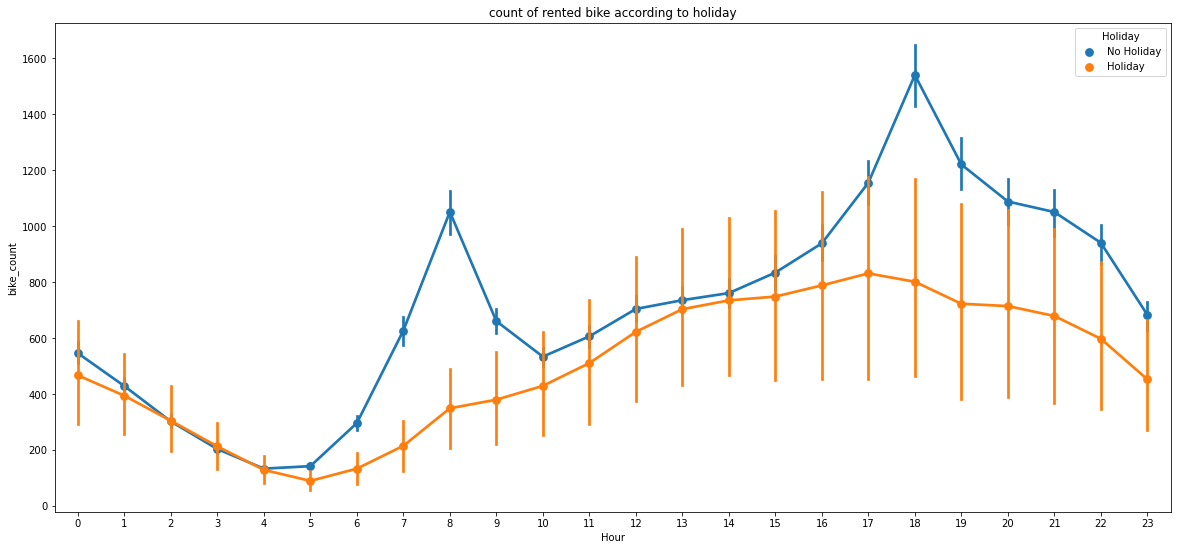

In [19]:
fig,ax=plt.subplots(figsize=(20,9))
sns.pointplot(x='Hour',y='bike_count',data=df,hue='Holiday')
plt.title('count of rented bike according to holiday')

**In the above bar plot and point plot which shows the use of rented bike in a holiday, and it clearly shows that,**

**plot shows that in holiday people uses the rented bike from 2pm-8pm**

### Season

Text(0.5, 1.0, 'count of rent bike according to Seasons')

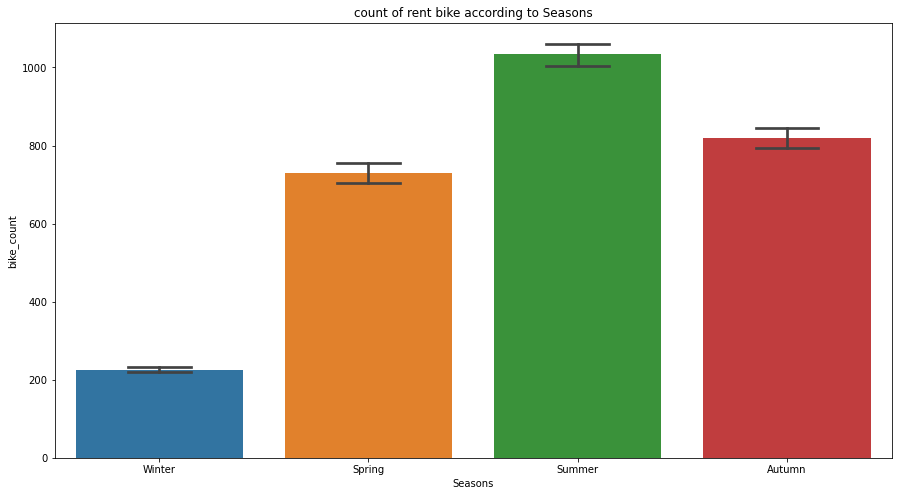

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(x='Seasons',y='bike_count',capsize=0.3,data=df)
plt.title('count of rent bike according to Seasons')

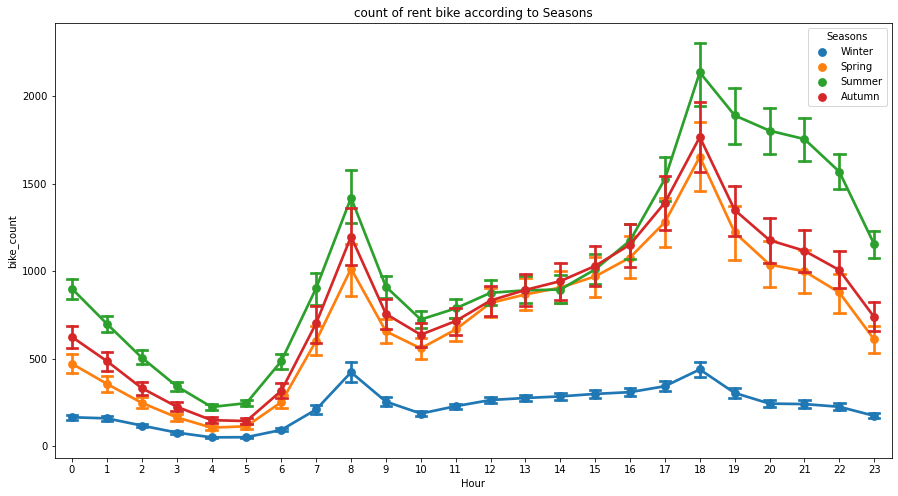

In [21]:
plt.figure(figsize=(15,8))
sns.pointplot(x='Hour',y='bike_count',hue='Seasons',capsize=0.3,data=df)
plt.title('count of rent bike according to Seasons')
plt.savefig('month_vs_bike.png')

**In the above bar plot and point plot which shows the use of rented bike in in four different seasons, and it clearly shows that,**

**In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm.**

**In winter season the use of rented bike is very low because of snowfall.**

### Functioning Day

Text(0.5, 1.0, 'bike rented according to fuctioning day')

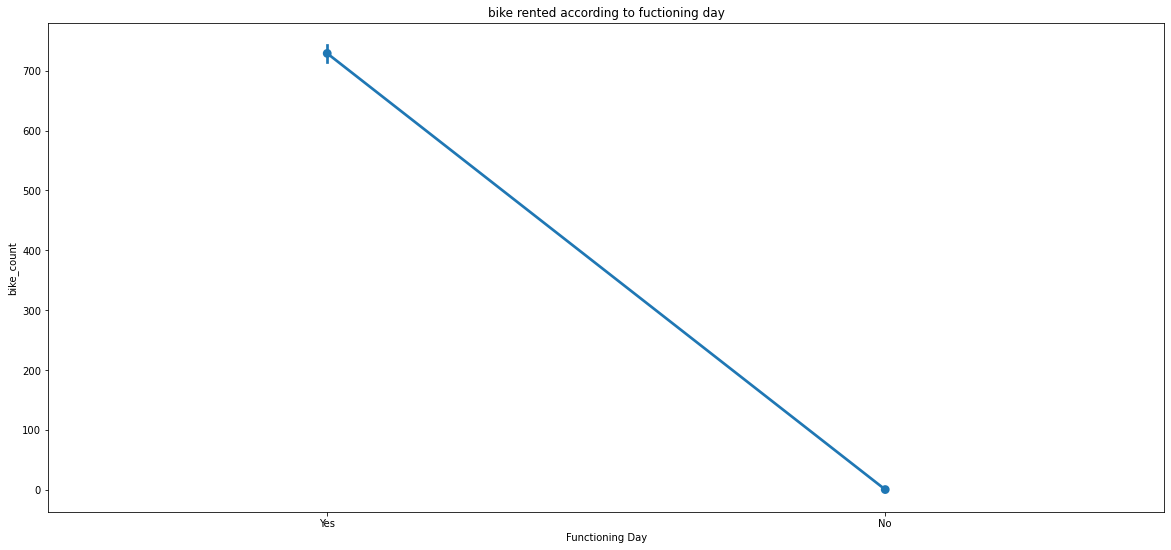

In [22]:
plt.figure(figsize=(20,9))
sns.pointplot(x='Functioning Day',y='bike_count',data=df)
plt.title('bike rented according to fuctioning day')

Text(0.5, 1.0, 'bike rented according to fuctioning day')

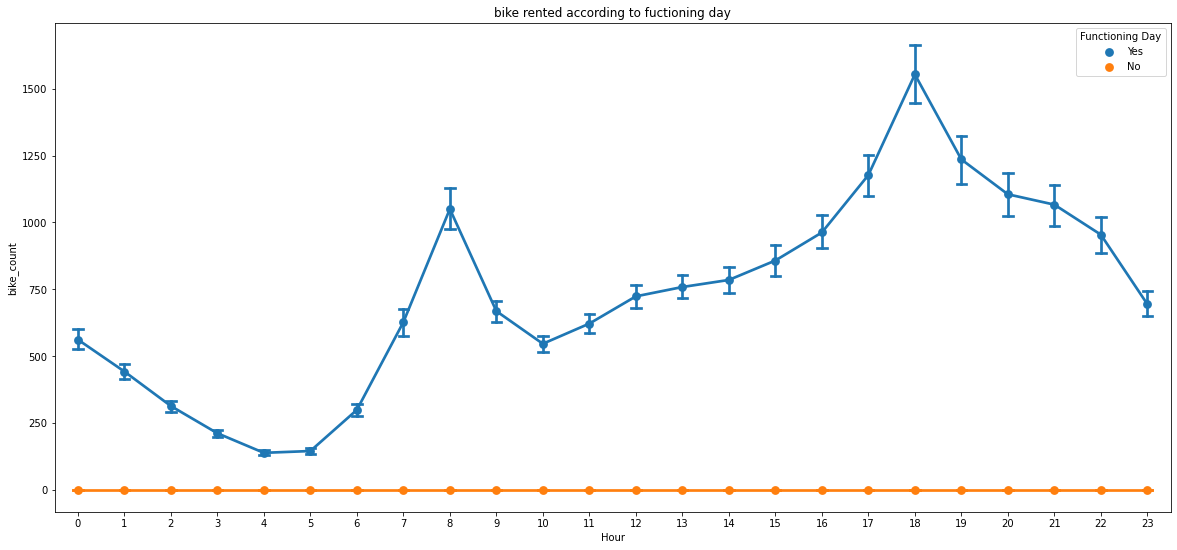

In [23]:
plt.figure(figsize=(20,9))
sns.pointplot(x='Hour',y='bike_count',hue='Functioning Day',data=df,capsize=0.2)
plt.title('bike rented according to fuctioning day')

**In the above bar plot and point plot which shows the use of rented bike in functioning daya or not, and it clearly shows 
that,**

**Peoples dont use reneted bikes in no functioning day.**

### day

Text(0.5, 1.0, 'bike rented according to fuctioning day')

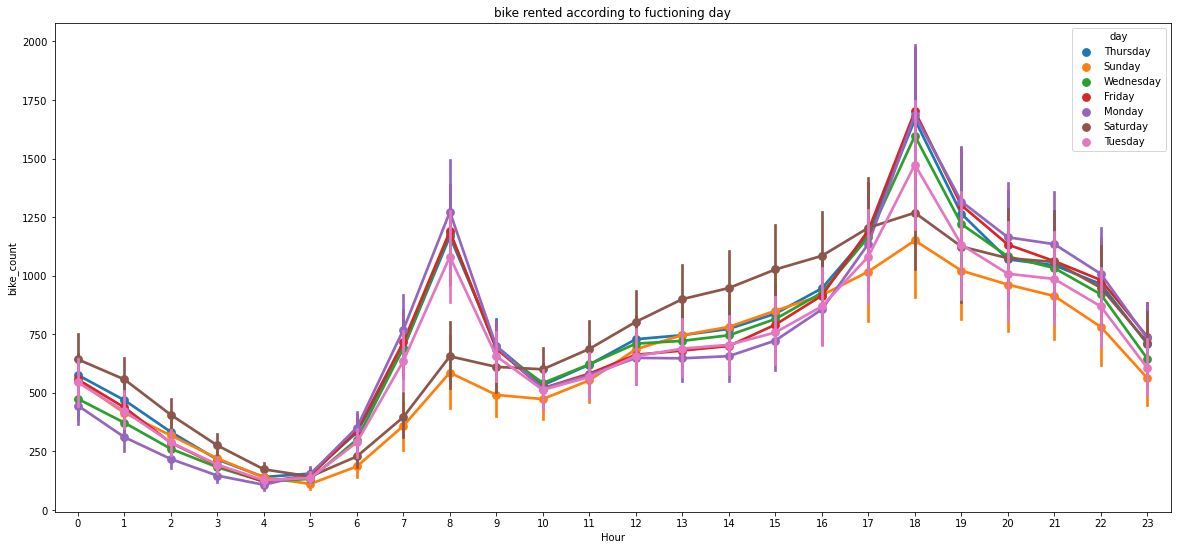

In [24]:
plt.figure(figsize=(20,9))
sns.pointplot(x='Hour',y='bike_count',hue='day',data=df)
plt.title('bike rented according to fuctioning day')

Text(0.5, 1.0, 'bike rented according to fuctioning day')

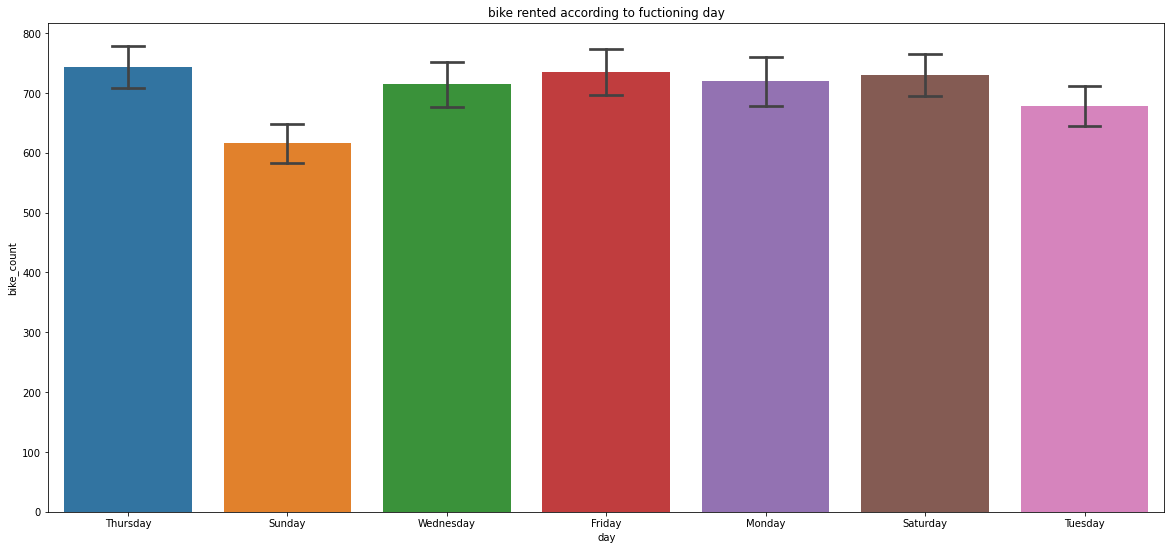

In [25]:
plt.figure(figsize=(20,9))
sns.barplot(x='day',y='bike_count',data=df,capsize=0.2)
plt.title('bike rented according to fuctioning day')

### months

Text(0.5, 1.0, 'bike rented according to fuctioning day')

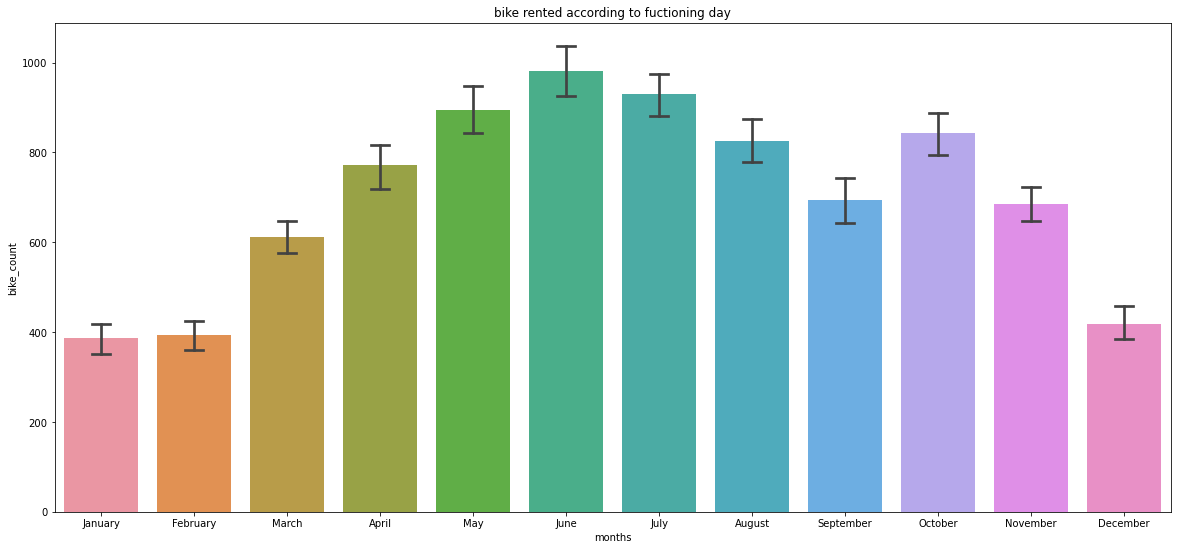

In [26]:
plt.figure(figsize=(20,9))
sns.barplot(x='months',y='bike_count',data=df,capsize=0.2)
plt.title('bike rented according to fuctioning day')


**From the above bar plot we can clearly say that from the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.**

Text(0.5, 1.0, 'bike rented according to fuctioning day')

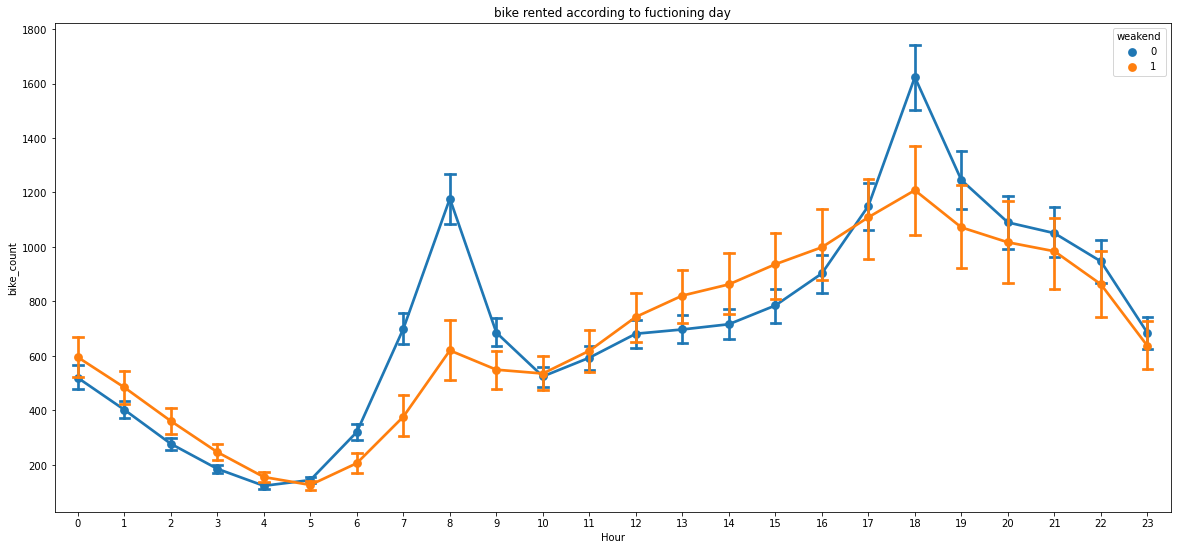

In [27]:
plt.figure(figsize=(20,9))
sns.pointplot(x='Hour',y='bike_count',hue='weakend',data=df,capsize=0.2)
plt.title('bike rented according to fuctioning day')

***From the above point plot and bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office. Peak Time are 7 am to 9 am and 5 pm to 7 pm The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.***

In [28]:
cat_cl=[feat for feat in df.columns if df[feat].dtypes=='O']
cat_cl

['Seasons', 'Holiday', 'Functioning Day', 'day', 'months']

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rakesh\anaconda3\li

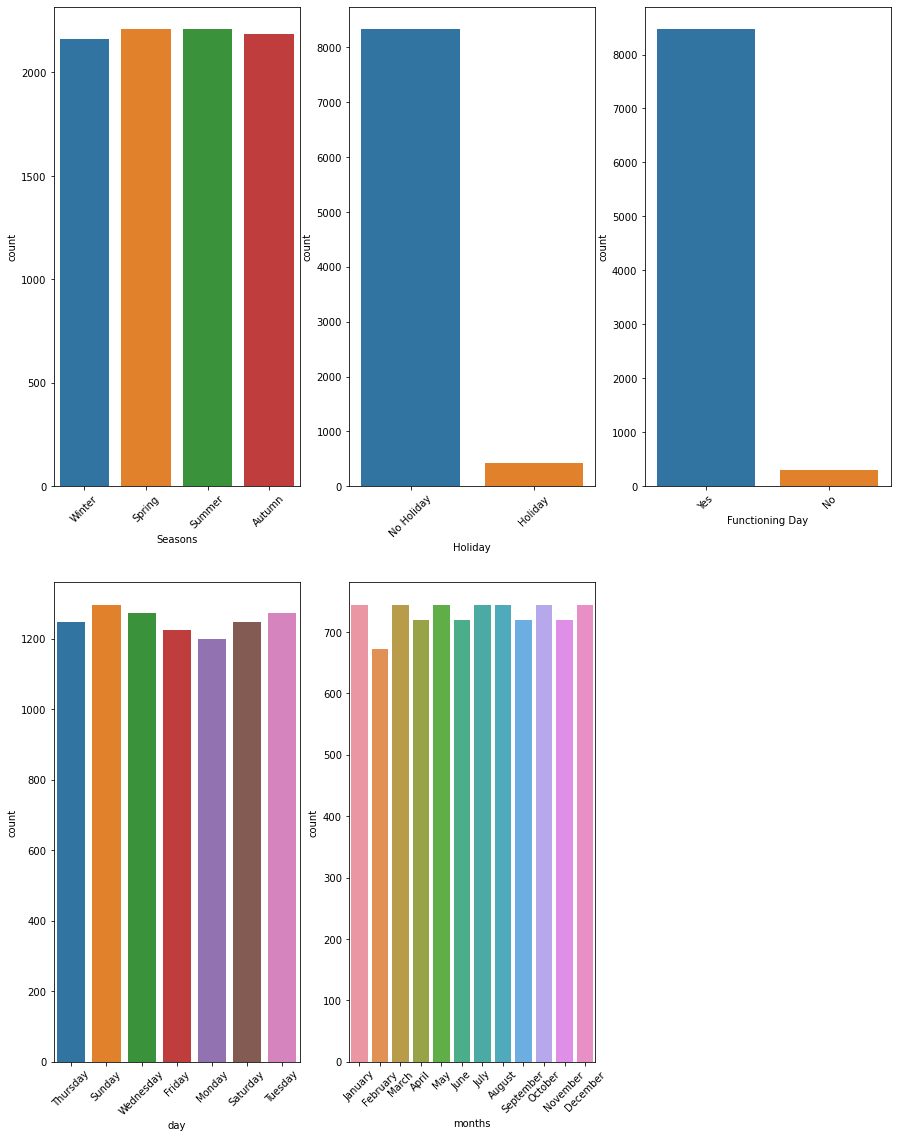

In [29]:

plt.figure(figsize = (15, 30))
for i in enumerate(cat_cl):
    plt.subplot(3, 3,i[0]+1)
    sns.countplot(i[1],  data = df)
    plt.xticks(rotation = 45)

## Hour with respect to bike counts

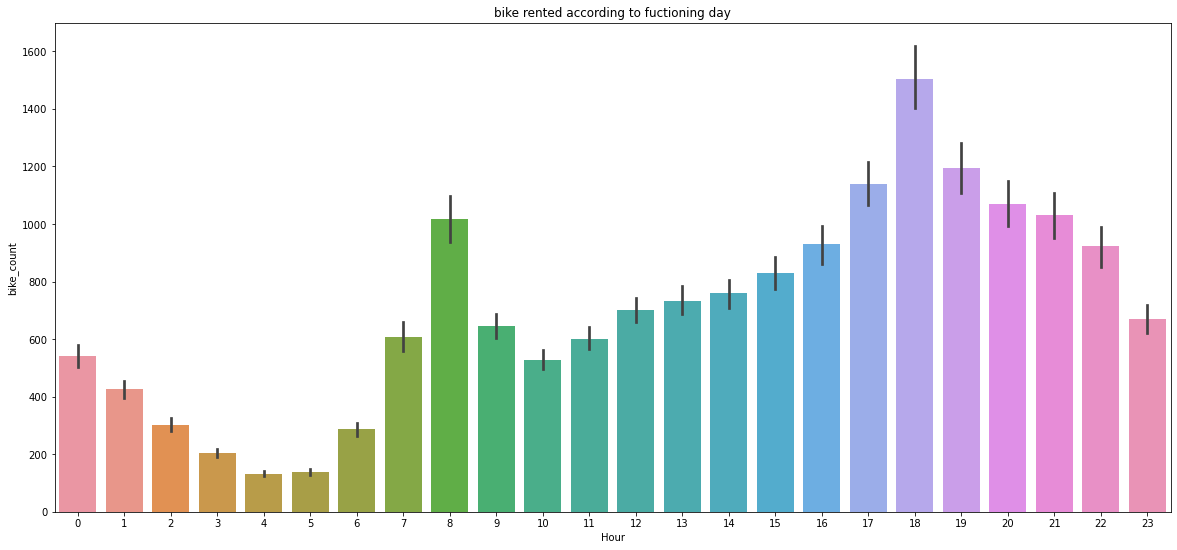

In [30]:
plt.figure(figsize=(20,9))
sns.barplot(x='Hour',y='bike_count',data=df)
plt.title('bike rented according to fuctioning day')
plt.savefig('hour vs bike counts.png')
plt.show()

**In the above plot which shows the use of rented bike according the hours and the data are from all over the year.**

**generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.**

### ***visualisation of numerical variable***

#### analyze of numerical variables boxplots

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rakesh\anaconda3\li

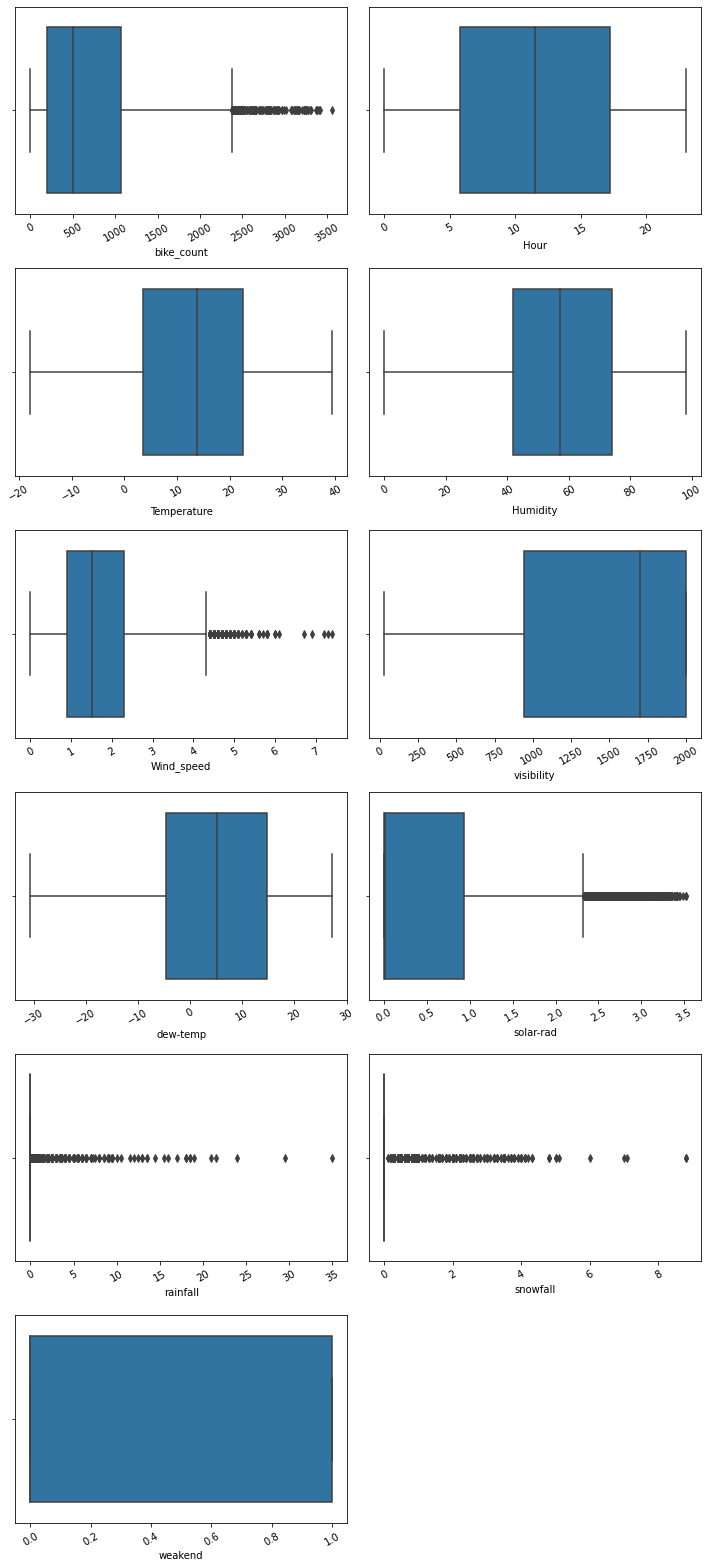

In [31]:
num_col=[feat for feat in df.columns if df[feat].dtypes!='O']

plt.figure(figsize=(10,25))
for i in enumerate(num_col):
    ax=plt.subplot(7,2,i[0]+1)
    sns.boxplot(i[1],ax=ax,data=df)
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### analyze of numerical variables histplots

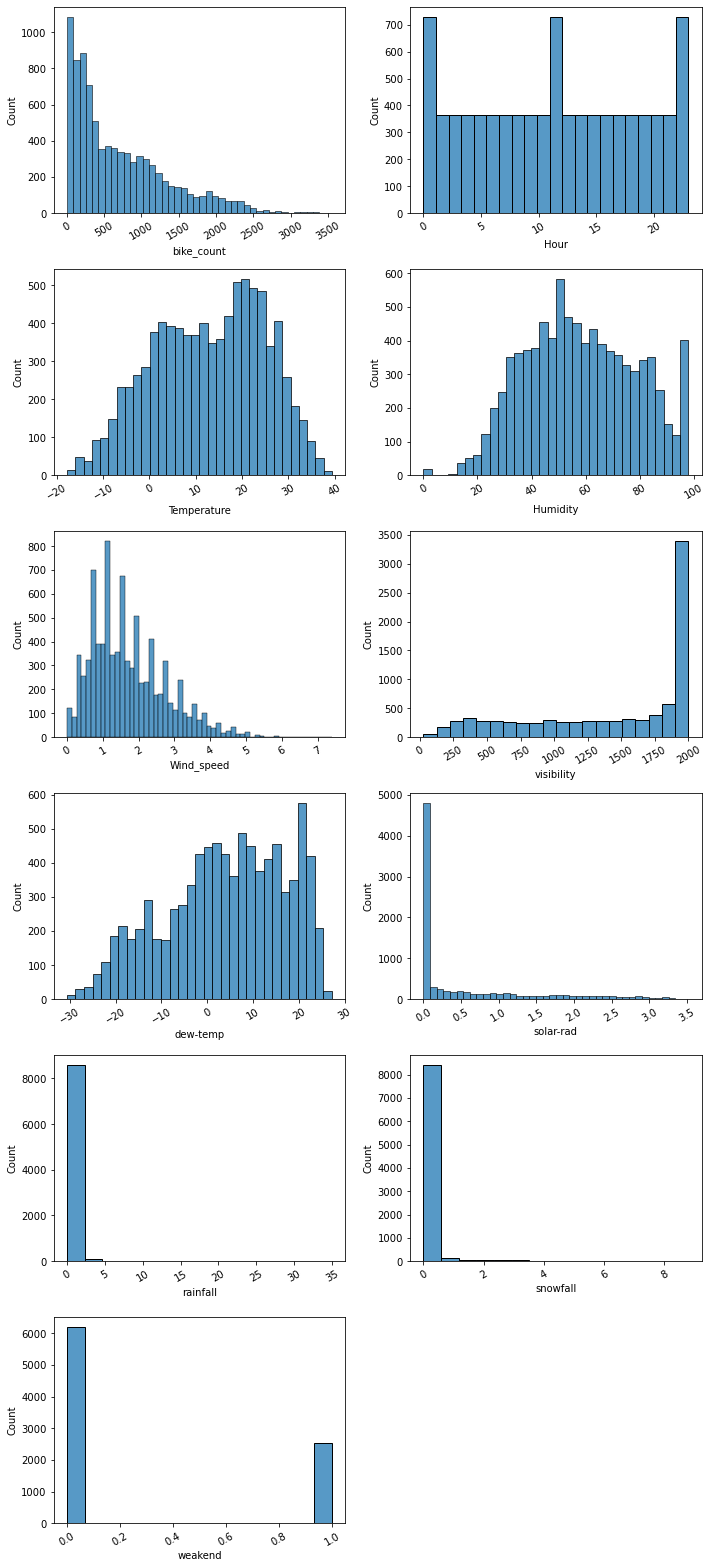

In [32]:
plt.figure(figsize=(10,25))
for i,j in enumerate(num_col):
    ax=plt.subplot(7,2,i+1)
    sns.histplot(df[j],ax=ax)
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### analyze of numerical variables distplots

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

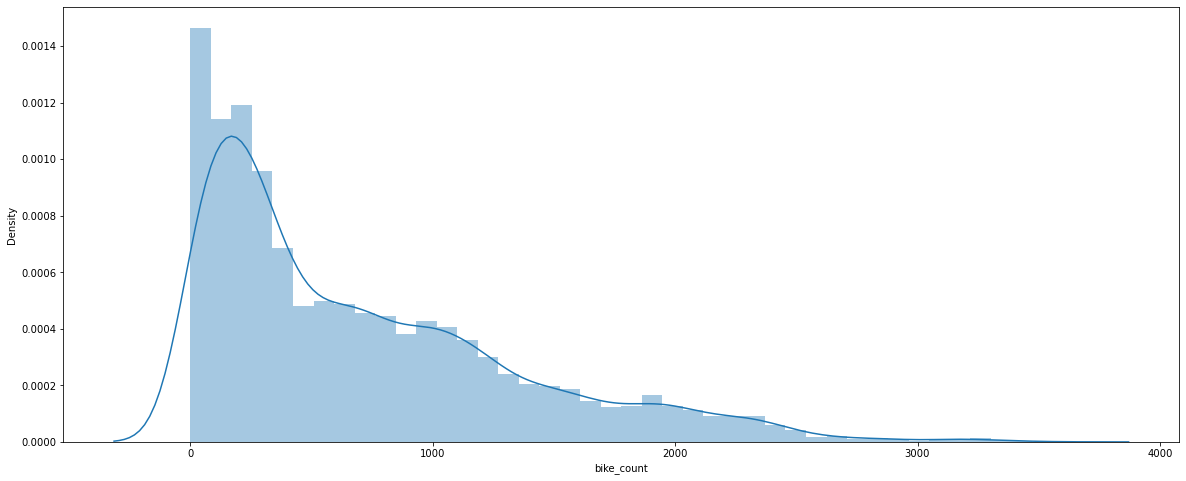

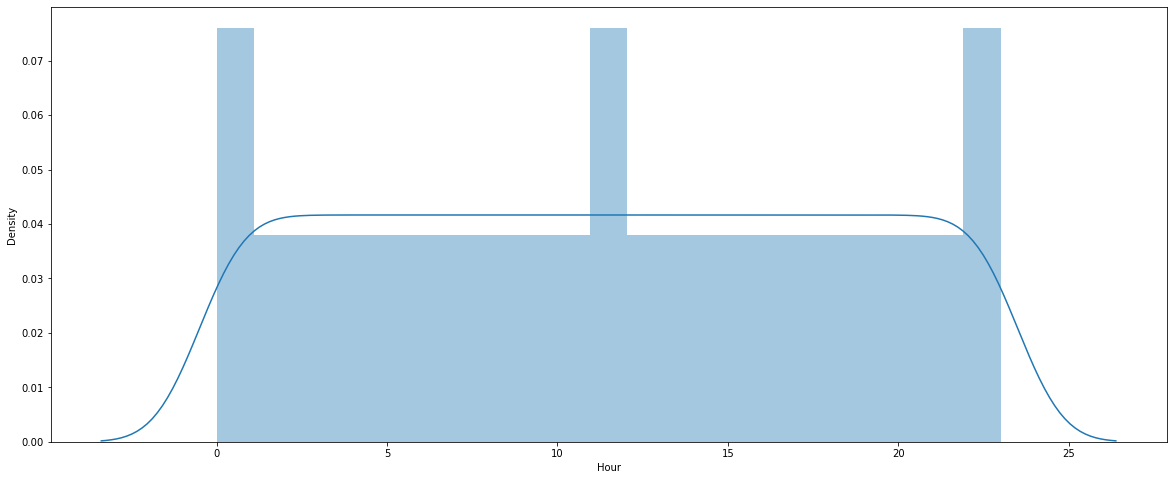

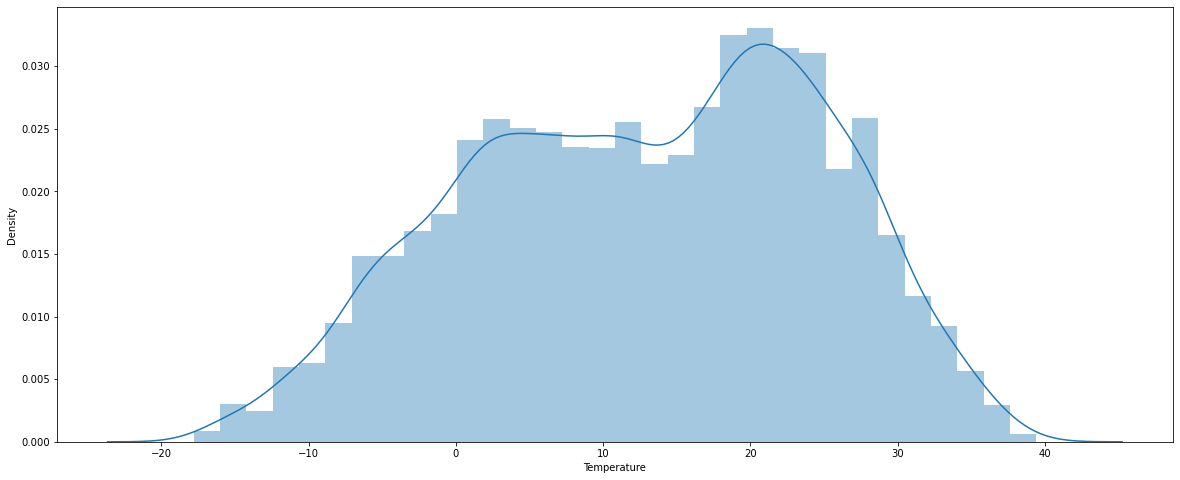

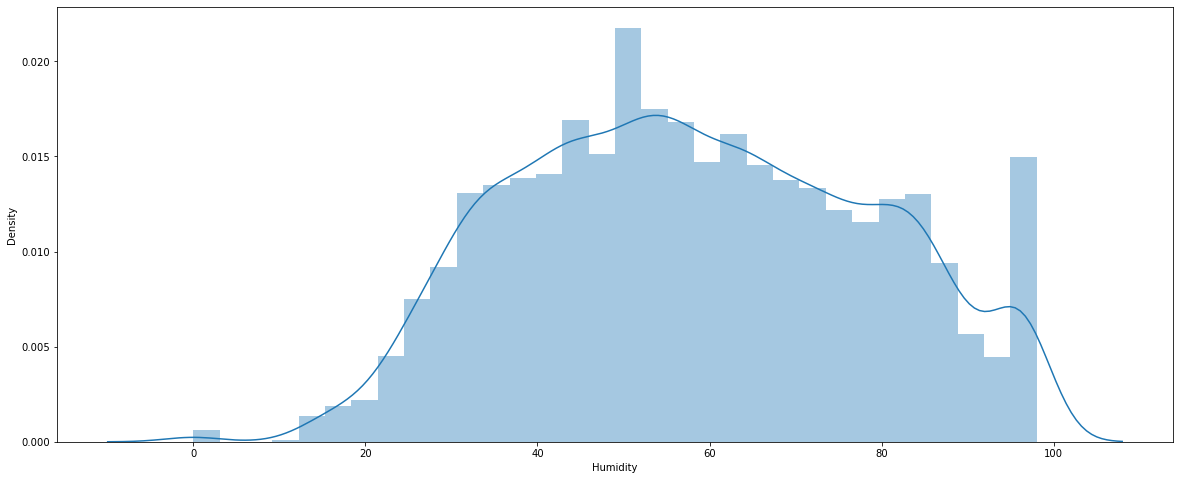

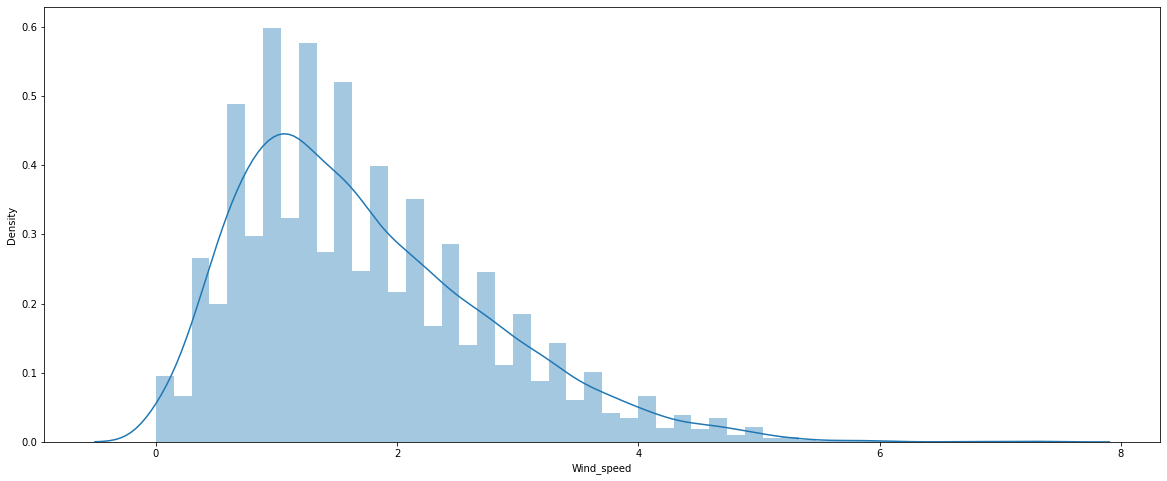

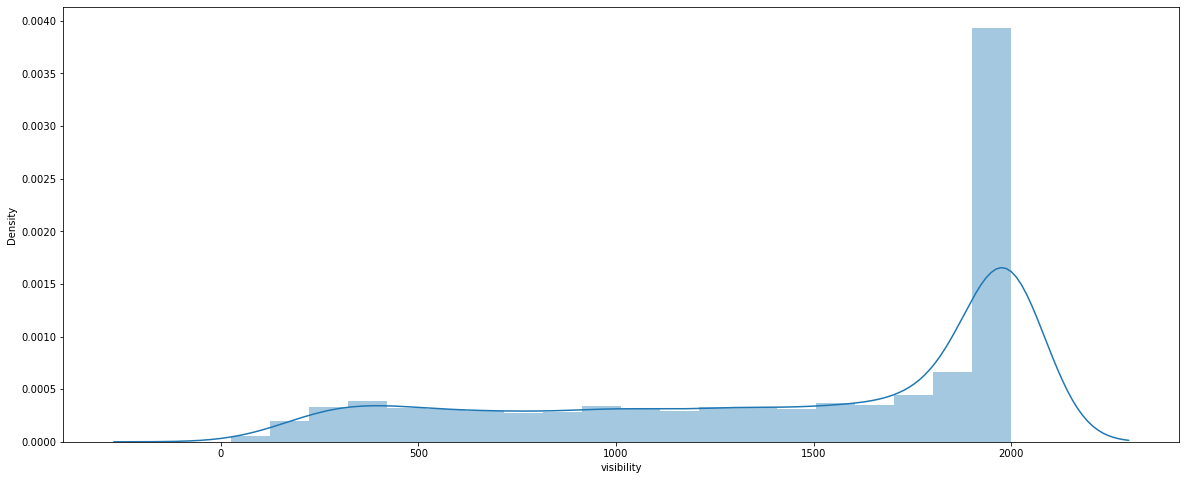

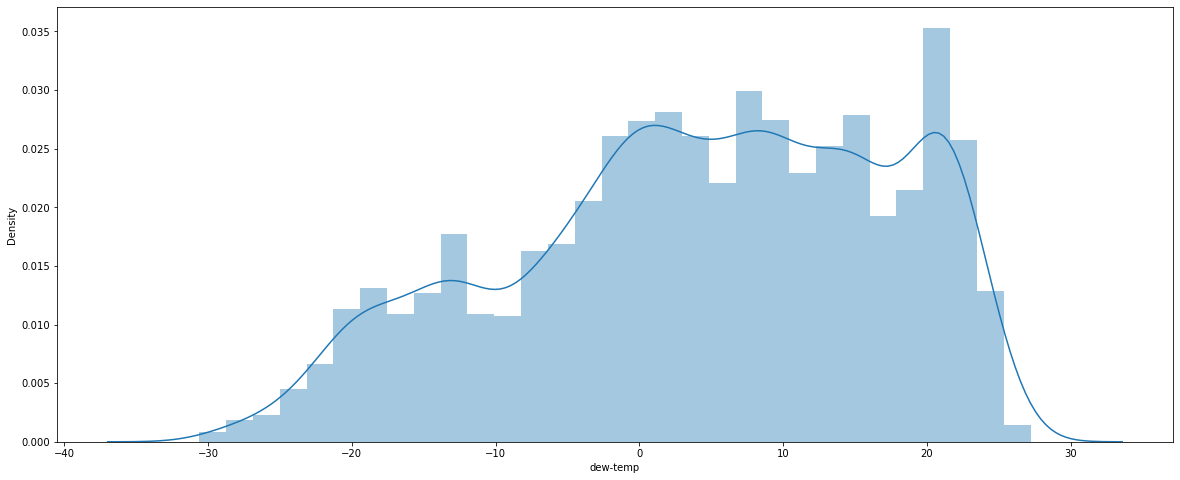

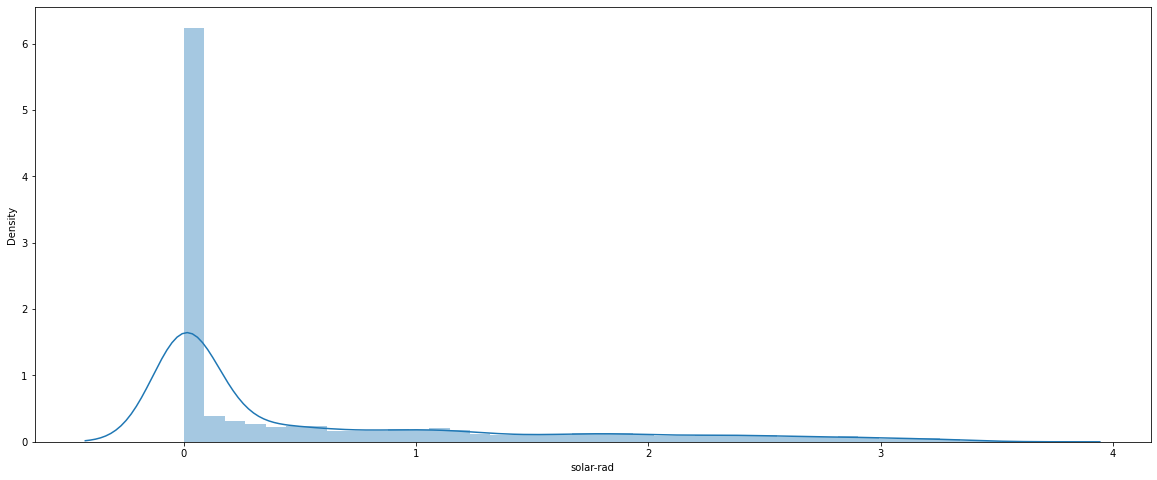

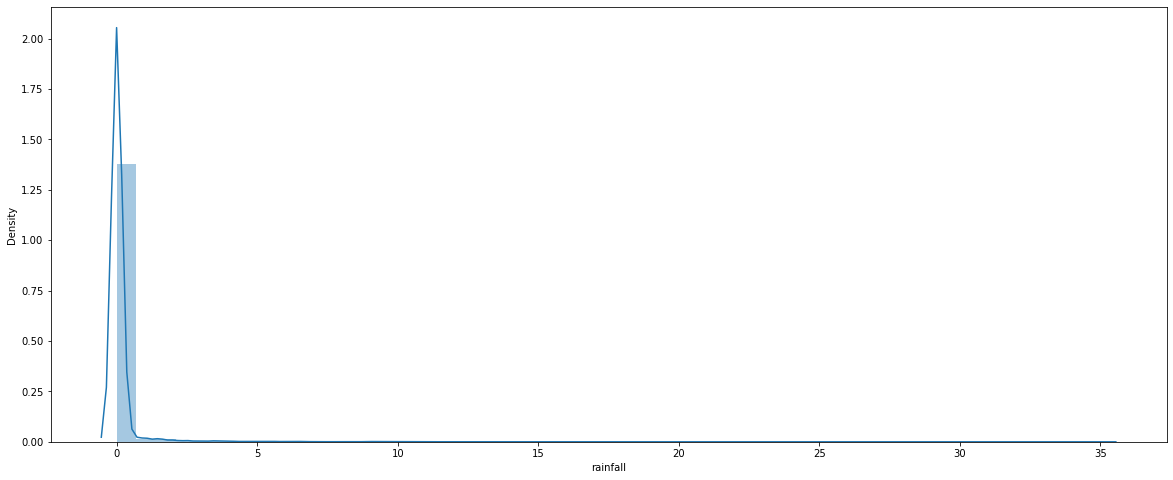

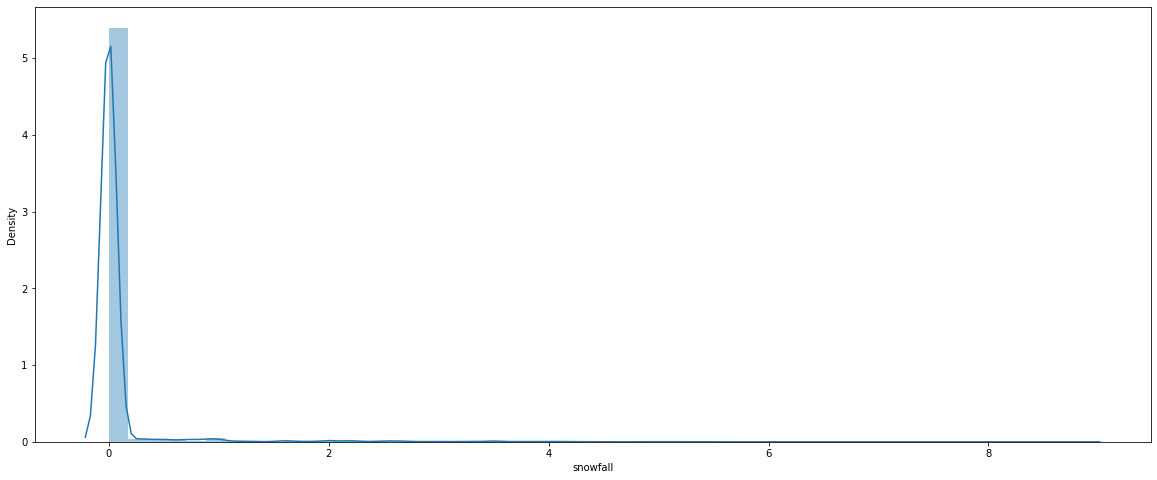

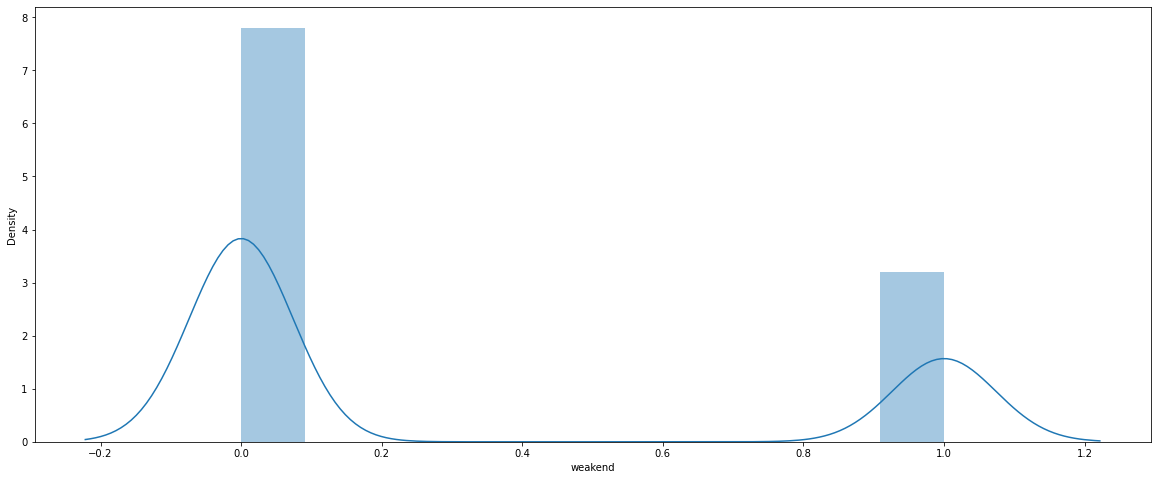

In [33]:
for i in num_col:
    plt.figure(figsize=(20,8))
    sns.distplot(x=df[i])
    plt.xlabel(i)
plt.show()

<AxesSubplot:xlabel='visibility', ylabel='snowfall'>

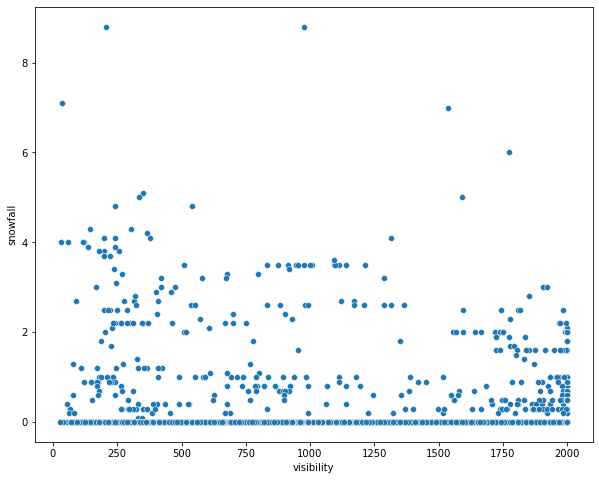

In [34]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='visibility',y='snowfall',data=df)

### **visualise the variable with dependent variable**

<AxesSubplot:xlabel='bike_count', ylabel='Hour'>

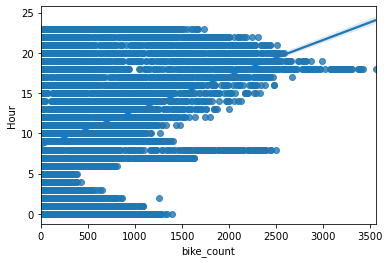

In [35]:
sns.regplot(x='bike_count',y='Hour',data=df)

In [36]:
num_col=[col for col in df.columns if df[col].dtypes!='O' ]
num_col

['bike_count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'visibility',
 'dew-temp',
 'solar-rad',
 'rainfall',
 'snowfall',
 'weakend']

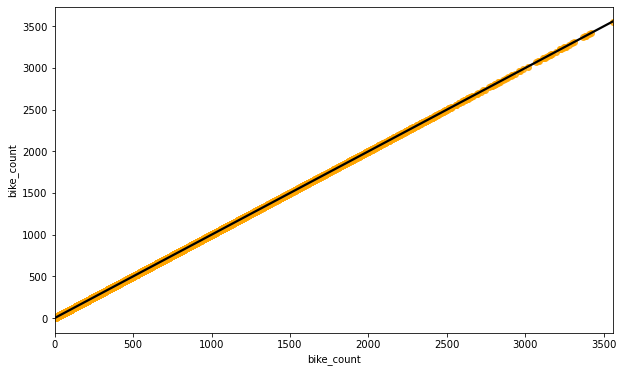

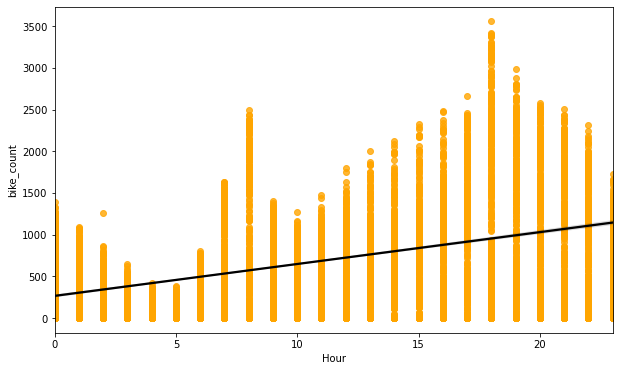

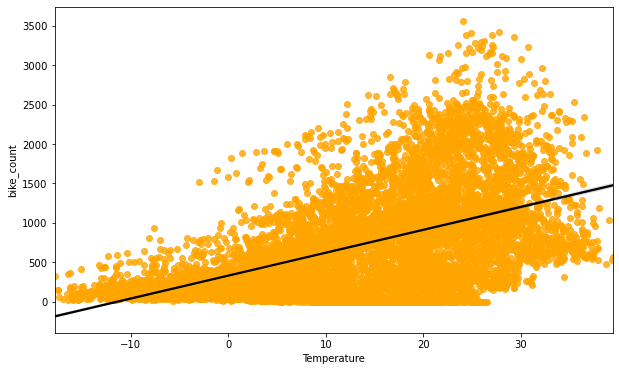

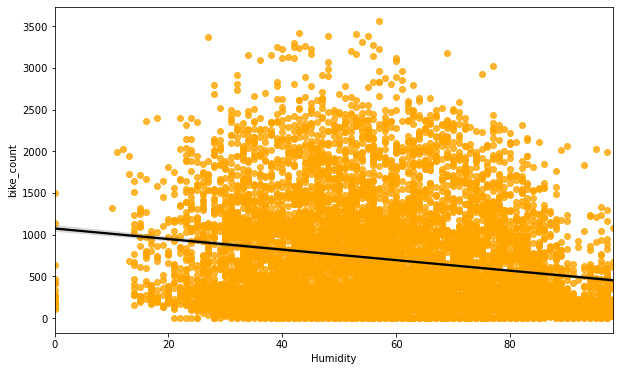

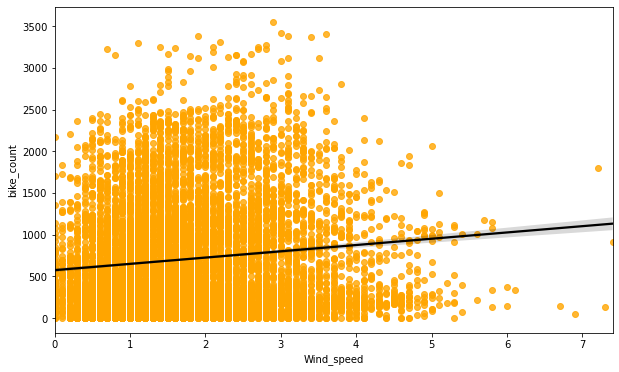

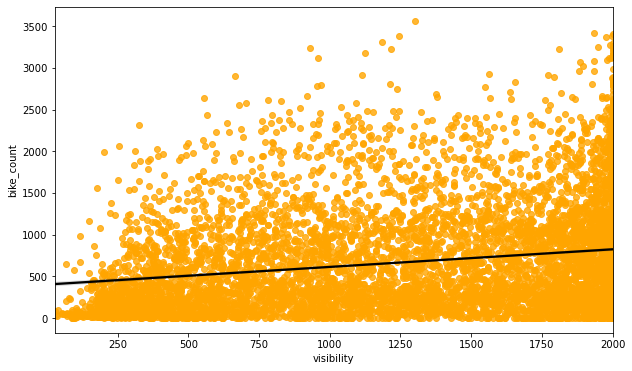

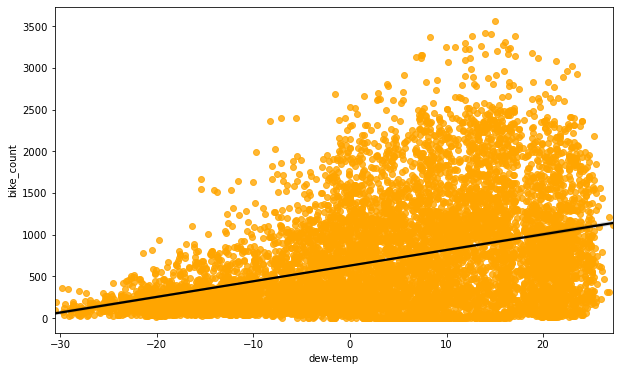

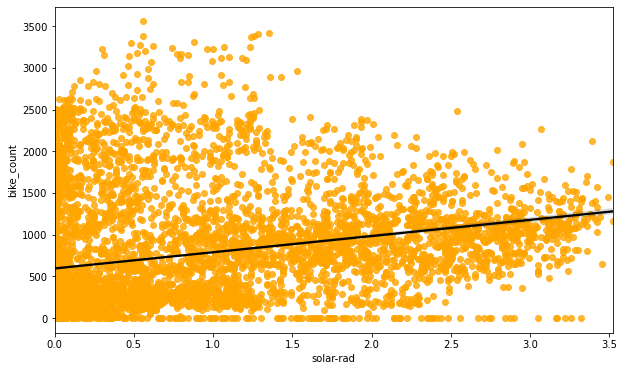

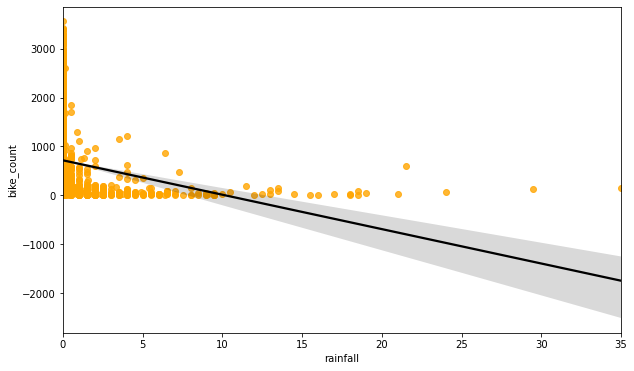

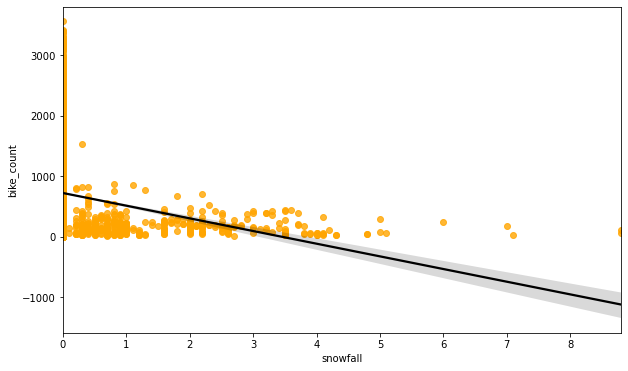

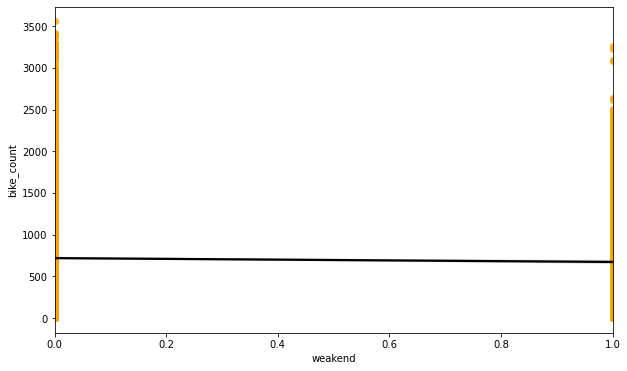

In [37]:
for i in num_col:
    fig,ax=plt.subplots(figsize=(10,6))
    sns.regplot(x=df[i],y=df['bike_count'],scatter_kws={'color':'orange'},line_kws={'color':'black'})
   

***1 From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.***

**2 which means the rented bike count increases with increase of these features.**

**3'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.**

### Numerical vs.Rented_Bike_Count

<AxesSubplot:xlabel='Temperature'>

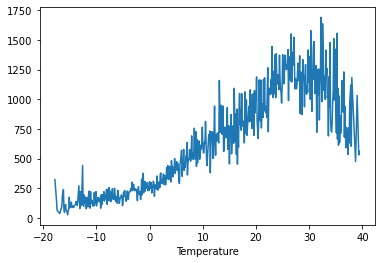

In [40]:
df.groupby("Temperature").mean()["bike_count"].plot()

***From the above plot we see that people like to ride bikes when it is pretty hot around 25°C in average***

<AxesSubplot:xlabel='dew-temp'>

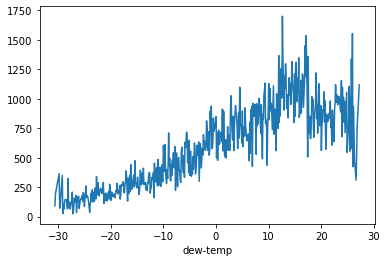

In [41]:
df.groupby('dew-temp').mean()['bike_count'].plot()

**From the above plot of "Dew_point_temperature' is almost same as the 'temperature' there is some similarity present we can check it in our next step.**

### Changing data type


***As "Hour","weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.***

<AxesSubplot:xlabel='rainfall', ylabel='bike_count'>

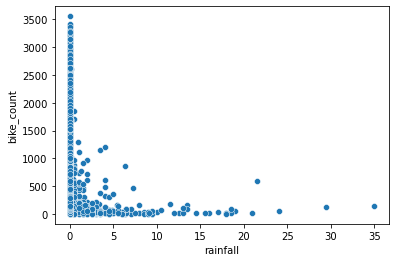

In [42]:
sns.scatterplot(x='rainfall',y='bike_count',data=df)

### Finding outliers and treaming

In [44]:
Q3=df['Wind_speed'].quantile(0.75)
Q1=df['Wind_speed'].quantile(0.25)
IQR=Q3-Q1


In [45]:
lower= Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)

In [46]:
lower

-1.1999999999999997

In [47]:
upper

4.3999999999999995

### Trimming

In [ ]:

# df1['wind']=df1[(df1['wind']<upper) & (df1['wind']>lower)]
# df1

### Capping

In [49]:
df2=df.copy()
df2['Wind_speed']=np.where(df2['Wind_speed']>upper,upper,
          np.where(df2['Wind_speed']<lower,lower,df2['Wind_speed']))
df2

bike_count  Hour  Temperature  Humidity  Wind_speed  visibility  \
0            254     0         -5.2        37         2.2        2000   
1            204     1         -5.5        38         0.8        2000   
2            173     2         -6.0        39         1.0        2000   
3            107     3         -6.2        40         0.9        2000   
4             78     4         -6.0        36         2.3        2000   
...          ...   ...          ...       ...         ...         ...   
8755        1003    19          4.2        34         2.6        1894   
8756         764    20          3.4        37         2.3        2000   
8757         694    21          2.6        39         0.3        1968   
8758         712    22          2.1        41         1.0        1859   
8759         584    23          1.9        43         1.3        1909   

      dew-temp  solar-rad  rainfall  snowfall Seasons     Holiday  \
0        -17.6        0.0       0.0       0.0  Winter  No Holiday   
1        -17.6        0.0       0.0       0.0  Winter  No Holiday   
2        -17.7        0.0       0.0       0.0  Winter  No Holiday   
3        -17.6        0.0       0.0       0.0  Winter  No Holiday   
4        -18.6        0.0       0.0       0.0  Winter  No Holiday   
...        ...        ...       ...       ...     ...         ...   
8755     -10.3        0.0       0.0       0.0  Autumn  No Holiday   
8756      -9.9        0.0       0.0       0.0  Autumn  No Holiday   
8757      -9.9        0.0       0.0       0.0  Autumn  No Holiday   
8758      -9.8        0.0       0.0       0.0  Autumn  No Holiday   
8759      -9.3        0.0       0.0       0.0  Autumn  No Holiday   

     Functioning Day       day    months  weakend  
0                Yes  Thursday   January        0  
1                Yes  Thursday   January        0  
2                Yes  Thursday   January        0  
3                Yes  Thursday   January        0  
4                Yes  Thursday   January        0  
...              ...       ...       ...      ...  
8755             Yes    Friday  November        0  
8756             Yes    Friday  November        0  
8757             Yes    Friday  November        0  
8758             Yes    Friday  November        0  
8759             Yes    Friday  November        0  

[8760 rows x 16 columns]

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='Wind_speed'>

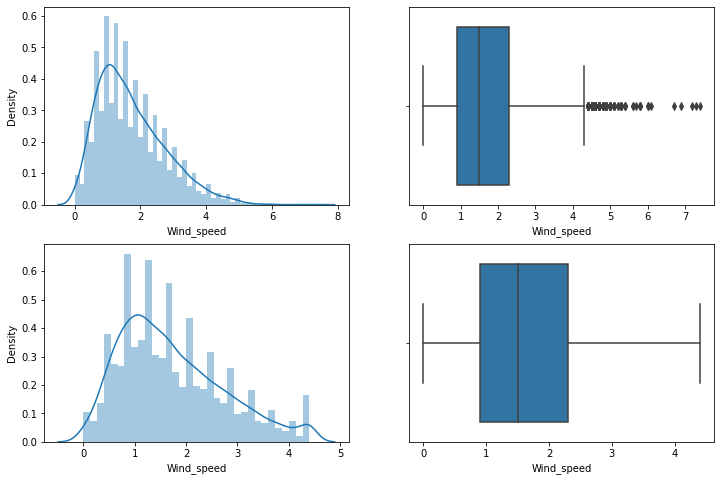

In [50]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(df['Wind_speed'])

plt.subplot(2,2,2)
sns.boxplot(df['Wind_speed'])

plt.subplot(2,2,3)
sns.distplot(df2['Wind_speed'])
plt.subplot(2,2,4)
sns.boxplot(df2['Wind_speed'])

In [51]:
q3=df2['bike_count'].quantile(0.75)
q1=df2['bike_count'].quantile(0.25)

iqr=q3-q1

lower_lim=q1-1.5*iqr
upper_lim=q3+1.5*iqr

df2['bike_count']=np.where(df2['bike_count']>upper_lim,upper_lim,
                          np.where(df2['bike_count']<lower_lim,lower_lim,
                                  df2['bike_count']))

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='bike_count'>

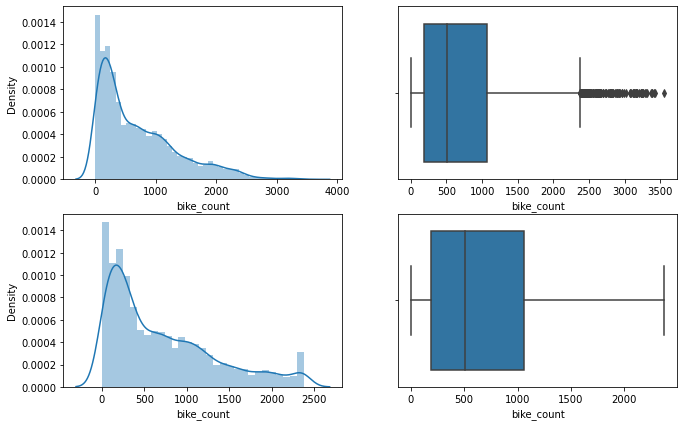

In [52]:
plt.figure(figsize=(11,7))
plt.subplot(2,2,1)
sns.distplot(df['bike_count'])
plt.subplot(2,2,2)
sns.boxplot(df['bike_count'])

plt.subplot(2,2,3)
sns.distplot(df2['bike_count'])
plt.subplot(2,2,4)
sns.boxplot(df2['bike_count'])

In [53]:
df=df2

### one hot encoding on catagorical variable

In [54]:
cols=['Hour','weakend']
for col in cols:
    df[cols]=df[cols].astype('category')
    

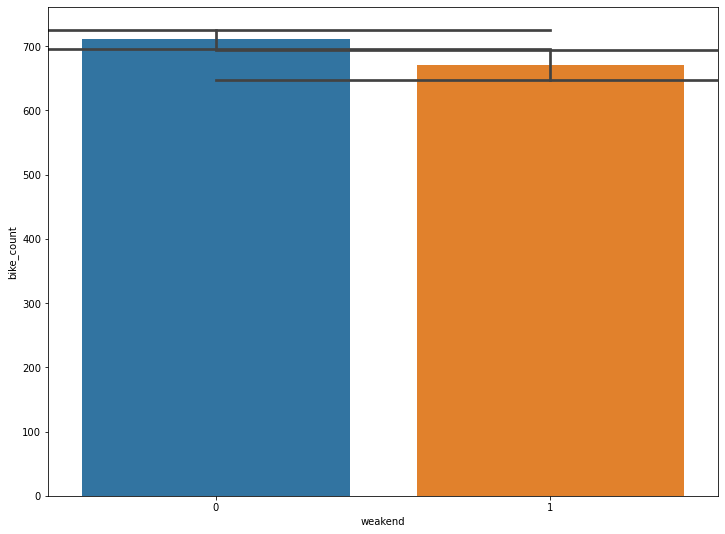

In [55]:
fig,ax=plt.subplots(figsize=(12,9))
sns.barplot(x="weakend",y="bike_count",data=df,ax=ax,capsize=2)
plt.show()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   bike_count       8760 non-null   float64 
 1   Hour             8760 non-null   category
 2   Temperature      8760 non-null   float64 
 3   Humidity         8760 non-null   int64   
 4   Wind_speed       8760 non-null   float64 
 5   visibility       8760 non-null   int64   
 6   dew-temp         8760 non-null   float64 
 7   solar-rad        8760 non-null   float64 
 8   rainfall         8760 non-null   float64 
 9   snowfall         8760 non-null   float64 
 10  Seasons          8760 non-null   object  
 11  Holiday          8760 non-null   object  
 12  Functioning Day  8760 non-null   object  
 13  day              8760 non-null   object  
 14  months           8760 non-null   object  
 15  weakend          8760 non-null   category
dtypes: category(2), float64(7), int64(2), obje

In [57]:
df_copy=df

In [58]:
df_copy.drop(columns=['dew-temp','day'],axis=1,inplace=True)

In [59]:
cat=list(df_copy.select_dtypes(['object','category']))
cat

['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'months', 'weakend']

In [60]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   bike_count       8760 non-null   float64 
 1   Hour             8760 non-null   category
 2   Temperature      8760 non-null   float64 
 3   Humidity         8760 non-null   int64   
 4   Wind_speed       8760 non-null   float64 
 5   visibility       8760 non-null   int64   
 6   solar-rad        8760 non-null   float64 
 7   rainfall         8760 non-null   float64 
 8   snowfall         8760 non-null   float64 
 9   Seasons          8760 non-null   object  
 10  Holiday          8760 non-null   object  
 11  Functioning Day  8760 non-null   object  
 12  months           8760 non-null   object  
 13  weakend          8760 non-null   category
dtypes: category(2), float64(6), int64(2), object(4)
memory usage: 839.3+ KB


In [61]:
num_col=[col for col in df_copy.columns if df_copy[col].dtypes!='O' ]
num_col

['bike_count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'visibility',
 'solar-rad',
 'rainfall',
 'snowfall',
 'weakend']

In [62]:
def get_dummie_(data,column):
    data=pd.concat([data,pd.get_dummies(data[column],prefix=column,drop_first=True)],axis=1)
    data=data.drop([column],axis=1)
    return data

In [63]:
for i in cat:
    df_copy=get_dummie_(df_copy,i)
df_copy.head()

bike_count  Temperature  Humidity  Wind_speed  visibility  solar-rad  \
0       254.0         -5.2        37         2.2        2000        0.0   
1       204.0         -5.5        38         0.8        2000        0.0   
2       173.0         -6.0        39         1.0        2000        0.0   
3       107.0         -6.2        40         0.9        2000        0.0   
4        78.0         -6.0        36         2.3        2000        0.0   

   rainfall  snowfall  Hour_1  Hour_2  Hour_3  Hour_4  Hour_5  Hour_6  Hour_7  \
0       0.0       0.0       0       0       0       0       0       0       0   
1       0.0       0.0       1       0       0       0       0       0       0   
2       0.0       0.0       0       1       0       0       0       0       0   
3       0.0       0.0       0       0       1       0       0       0       0   
4       0.0       0.0       0       0       0       1       0       0       0   

   Hour_8  Hour_9  Hour_10  Hour_11  Hour_12  Hour_13  Hour_14  Hour_15  \
0       0       0        0        0        0        0        0        0   
1       0       0        0        0        0        0        0        0   
2       0       0        0        0        0        0        0        0   
3       0       0        0        0        0        0        0        0   
4       0       0        0        0        0        0        0        0   

   Hour_16  Hour_17  Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  Hour_23  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0               0               0               1                   1   
1               0               0               1                   1   
2               0               0               1                   1   
3               0               0               1                   1   
4               0               0               1                   1   

   Functioning Day_Yes  months_August  months_December  months_February  \
0                    1              0                0                0   
1                    1              0                0                0   
2                    1              0                0                0   
3                    1              0                0                0   
4                    1              0                0                0   

   months_January  months_July  months_June  months_March  months_May  \
0               1            0            0             0           0   
1               1            0            0             0           0   
2               1            0            0             0           0   
3               1            0            0             0           0   
4               1            0            0             0           0   

   months_November  months_October  months_September  weakend_1  
0                0               0                 0          0  
1                0               0                 0          0  
2                0               0                 0          0  
3                0               0                 0          0  
4                0               0                 0          0

In [64]:
df=df_copy

### Lets split the data for train

In [65]:
x=df.drop(columns='bike_count')
y=np.sqrt(df['bike_count'])

### Train test split

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,test_size=0.20)

In [67]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: bike_count, dtype: float64

## Linear regression

In [68]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [69]:
lr.score(x_test,y_test)

0.7769776281386453

In [70]:
y_pred=lr.predict(x_test)

In [71]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred)
print('mean square error ',mse)

rmse=np.sqrt(mse)
print('root mean square error',rmse)

mae=mean_absolute_error(y_test,y_pred)
print('mean absolute error',mae)
r2=r2_score(y_test,y_pred)
print('r2 score',r2)

mean square error  34.18863082235884
root mean square error 5.8471044819088736
mean absolute error 4.551758769388464
r2 score 0.7769776281386453


### Lasso Regression

In [72]:
from sklearn.linear_model import Lasso
Ls=Lasso().fit(x_train,y_train)
Ls_pred=Ls.predict(x_test)
Ls.score(x_test,y_test)

0.4173733073445133

In [73]:
Ls_mse=mean_squared_error(y_test,Ls_pred)
print('mean square error ',Ls_mse)

Ls_rmse=np.sqrt(Ls_mse)
print('root mean square error',Ls_rmse)

Ls_mae=mean_absolute_error(y_test,Ls_pred)
print('mean absolute error',Ls_mae)

Ls_r2=r2_score(y_test,Ls_pred)
print('r2 score',Ls_r2)

mean square error  89.31484647124749
root mean square error 9.450653229869747
mean absolute error 7.2036403719883015
r2 score 0.4173733073445133


## Suport Vector Machine

In [74]:
from sklearn.svm import SVR
svm_model=SVR().fit(x_train,y_train)

In [75]:
svm_model.score(x_test,y_test)


0.09906208509386005

In [76]:
y_pred_sv=svm_model.predict(x_test)

In [77]:
mse_svr=mean_squared_error(y_test,y_pred_sv)
print('mean square error ',mse_svr)

rmse_svr=np.sqrt(mse_svr)
print('root mean square error',rmse_svr)

mae_svr=mean_absolute_error(y_test,y_pred_sv)
print('mean absolute error',mae_svr)

r2_svr=r2_score(y_test,y_pred_sv)
print('r2 score',r2_svr)

mean square error  138.11095949486267
root mean square error 11.752061925247954
mean absolute error 9.675082649589896
r2 score 0.09906208509386005


## Random forest 

In [78]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=150,n_jobs=-1,oob_score=True).fit(x_train,y_train)

In [79]:
y_pred_rfr=rfr.predict(x_test)
print('model score',rfr.score(x_test,y_test))

model score 0.9158927735055326


In [80]:

mse_rfr=mean_squared_error(y_test,y_pred_rfr)
print('mean square error ',mse_rfr)

rmse_rfr=np.sqrt(mse_rfr)
print('root mean square error',rmse_rfr)

mae_rfr=mean_absolute_error(y_test,y_pred_rfr)
print('mean absolute error',mae_rfr)

r2_rfr=r2_score(y_test,y_pred_rfr)
print('r2 score',r2_rfr)

mean square error  12.893374292958704
root mean square error 3.590734506052864
mean absolute error 2.4252805075617574
r2 score 0.9158927735055324


In [81]:
importances = rfr.feature_importances_

importance_dict = {'Feature' : list(x_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
importance_df.head()

importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0           Temperature                0.30
1              Humidity                0.17
34  Functioning Day_Yes                0.17
4             solar-rad                0.03
5              rainfall                0.03
10               Hour_4                0.03
11               Hour_5                0.03
9                Hour_3                0.02
14               Hour_8                0.02
24              Hour_18                0.02
32       Seasons_Winter                0.01
30       Seasons_Spring                0.01
28              Hour_22                0.01
27              Hour_21                0.01
26              Hour_20                0.01
25              Hour_19                0.01
23              Hour_17                0.01
3            visibility                0.01
12               Hour_6                0.01
2            Wind_speed                0.01
8                Hour_2                0.01
46            weakend_1                0.01
22              Hour_16                0.00
35        months_August                0.00
45     months_September                0.00
44       months_October                0.00
43      months_November                0.00
42           months_May                0.00
41         months_March                0.00
40          months_June                0.00
39          months_July                0.00
38       months_January                0.00
37      months_February                0.00
36      months_December                0.00
19              Hour_13                0.00
16              Hour_10                0.00
33   Holiday_No Holiday                0.00
18              Hour_12                0.00
31       Seasons_Summer                0.00
6              snowfall                0.00
29              Hour_23                0.00
7                Hour_1                0.00
20              Hour_14                0.00
21              Hour_15                0.00
13               Hour_7                0.00
15               Hour_9                0.00
17              Hour_11                0.00

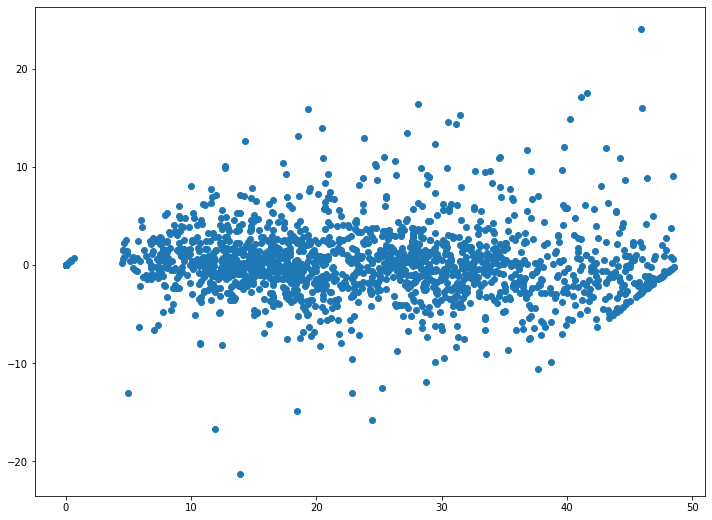

In [82]:
plt.figure(figsize=(12,9))
plt.scatter((y_pred_rfr),(y_pred_rfr)-(y_test))

### xgboost with grid searchcv

In [83]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_pred_x=xgb.predict(x_test)
print(xgb.score(x_test,y_test))

0.9184640684785897


In [84]:
xgb_r=mean_squared_error(y_test,y_pred_x)
xgb_re=np.sqrt(xgb_r)
xgb_ame=mean_absolute_error(y_test,y_pred_x)
r2_xgb=r2_score(y_test,y_pred_x)


print("mean square error",xgb_r)
print("root mean squre error",xgb_re)
print("absolute mean squre error",xgb_ame)
print('r2 score',r2_xgb)

mean square error 12.499202830089088
root mean squre error 3.535421167285319
absolute mean squre error 2.4296447570783726
r2 score 0.9184640684785897


### Hyperparameter tuning
##### Before proceding to try next models, let us try to tune some hyperparameters and see if the performance of our model improves.

##### Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.



### Using GridSearchCV

#### GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

**xgboost using gridsearchCV**

In [85]:
from sklearn.model_selection import RandomizedSearchCV



In [86]:
parameters = {'n_estimators':[300],
              'learning_rate': [0.05, 0.07,0.1], #so called `eta` value
              'max_depth': [5, 6, 7,8],
              'min_child_weight': [2,4,5,6],
              'gamma':[0.0,0.1,0.2,0.3,0.4],
              'colsample_bytree': [0.5,0.6,0.7]
              }

In [87]:
grid=RandomizedSearchCV(estimator=xgb,param_distributions=parameters,cv=5,n_jobs=-1,verbose=3)

In [ ]:

grid.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
grid.best_params_

In [ ]:
grid.score(x_test,y_test)

In [ ]:
grid.best_estimator_



In [ ]:
grid.best_index_

# xgb with gridsearchcv

In [ ]:
xgb1=XGBRegressor(n_estimators= 300,min_child_weight= 6,
 max_depth= 8,
 learning_rate =0.05,
 gamma= 0.4,
 colsample_bytree= 0.7)
                 
xgb1.fit(x_train,y_train)
y_pred_x1=xgb1.predict(x_test)
print(xgb1.score(x_test,y_test))

In [ ]:
gd_xgb_r=mean_squared_error(y_test,y_pred_x1)
gd_xgb_re=np.sqrt(gd_xgb_r)
gd_xgb_ame=mean_absolute_error(y_test,y_pred_x1)
gd_xgb_r2=r2_score(y_test,y_pred_x1)

print("mean square error",gd_xgb_r)
print("root mean squre error",gd_xgb_re)
print("absolute mean squre error",gd_xgb_ame)
print('r2 score',gd_xgb_r2)

In [ ]:
importances = xgb1.feature_importances_

importance_dict = {'Feature' : list(x_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
importance_df.head()

importance_df.sort_values(by=['Feature Importance'],ascending=False)

### **GradientBoosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred_gbr=gbr.predict(x_test)
print(gbr.score(x_test,y_test))

In [ ]:
gd_r=mean_squared_error(y_test,y_pred_gbr)
gd_re=np.sqrt(gd_r)
gd_ame=mean_absolute_error(y_test,y_pred_gbr)
r2_gb=r2_score(y_test,y_pred_gbr)


print("mean square error",gd_r)
print("root mean squre error",gd_re)
print("absolute mean squre error",gd_ame)
print("r2 score",r2_gb)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor().fit(x_train,y_train)
y_pred_dt=dtr.predict(x_test)
dtr.score(x_test,y_test)

In [ ]:
dt_mse=mean_squared_error(y_test,y_pred_dt)
dt_rmse=np.sqrt(dt_mse)
dt_ame=mean_absolute_error(y_test,y_pred_dt)
dt_r2=r2_score(y_test,y_pred_dt)

print("mean square error",dt_mse)
print("root mean squre error",dt_rmse)
print("absolute mean squre error",dt_ame)
print("r2 score",dt_r2)

## CONCLUSION


**• During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it.** 

**•Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.**

**•Next we implemented machine learning algorithms Linear Regression,decission tree, Random Forest,Svm, XGBoost and GradientBoost. We did hyperparameter tuning to improve our model performance.**

**• Feature Importance value for Random Forest and XGBOOST Boost are different.**

**• We can deploy this model.**

**•However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent.**

**•Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time.** 

**•Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.**